# Proyecto Integrador

## Avance 1

In [1]:
#Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Lectura de los datos
data = pd.read_csv("data_latinoamerica.csv")

In [3]:
#Comprobacion de lectura de datos
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [4]:
#Consulta de cantidad de datos con numpy (para confirmar registros y columnas especificadas)
np.shape(data)

(12216057, 50)

In [5]:
#Consulta de cantidad de datos con pandas (para confirmar registros y columnas especificadas)
data.shape

(12216057, 50)

Siguiendo las especificaciones del proyecto, nos enfocaremos en los países propuestos para el análisis

In [6]:
#Verificamos datos en la columna a utilizar será country_code para hacer el filtrado de los países
data["country_code"]

0           AR
1           AR
2           AR
3           AR
4           AR
            ..
12216052    VE
12216053    VE
12216054    VE
12216055    VE
12216056    VE
Name: country_code, Length: 12216057, dtype: object

In [7]:
#Creamos una lista de los países que vamos a necesitar
paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

#Filtramos generando una máscara para que la data muestre solo los países seleccionados
data_latinoamerica = data[data["country_name"].isin(paises_seleccionados)]

Revisaremos que cantidad de datos quedaron luego de este filtro, donde veremos una reducción del numero de registros

In [8]:
#Consulta de cantidad de datos con pandas (para confirmar registros y columnas especificadas)
data_latinoamerica.shape

(11970289, 50)

Verificaremos la cantidad de datos faltantes por columna para hacer una limpieza en caso de ser necesario, en donde se presenten valores a mas de 4millones de datos faltantes.

In [9]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum() > 4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


Al ver la cantidad de valores nulos, analizaremos si el filtro elegido en primera instancia es el correcto revisando si la columna location.key se ajusta mas 

In [10]:
#Haremos un conteo para verificar cuantas veces aparece un valor dentro de location.key
data_latinoamerica.location_key.value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_147       991
AR_A_140       991
AR_A_133       991
AR_A_126       991
AR_A_119       991
Name: count, Length: 12079, dtype: int64

Luego del análisis, se observan datos faltantes en muchas columnas, por lo que se hará un nuevo filtro desdee "Location_Key" pero solo en las instancias que correspondan a los países que hemos seleccionado y no a sus regiones o subregiones AR,CL,CO,MX,PE,BR.

In [11]:
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica["location_key"].isin(["AR","CL","CO","MX","PE","BR"])]

#Mostramos la cantidad de registros luego de este filtro
data_latinoamerica_paises.shape

(5946, 50)

Para la facilidad y comprensión de los datos, vamos a tomar desde el 2021-01-01,ya que es la fecha desde la cual se comienzan a registrar mejor los datos. 

In [12]:
data_latinoamerica_paises_Fecha=data_latinoamerica_paises[data_latinoamerica_paises["date"]>"2021-01-01"]

In [13]:
#Mostramos la cantidad de registros luego del filtro fecha
data_latinoamerica_paises_Fecha.shape

(3744, 50)

Con el nuevo filtro revisaremos la cantidad de nulos.

In [14]:
#Contamos los valores nulos
valores_nulos_Fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_Fecha)

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


Comenzamos analizando los nulos de new_confirmados

In [15]:
#verificamos el valor de la media para los países, pero en realidad este valor de media debería usarse en primer medida
# para llenar calculado por cada país, dado que este promedio toma el valor de todos en su conjunto
data_latinoamerica_paises_Fecha["new_confirmed"].mean()

np.float64(13936.279613215149)

Procedemos a reemplazar los valores nulos por columna de acuerdo a los valores por cada país

In [16]:
# Los nulos de la columna de temperatura promedio la rellenamos con el promedio de temperatura por cada país
data_latinoamerica_paises_Fecha.loc[:, 'average_temperature_celsius'] = (data_latinoamerica_paises_Fecha.groupby('country_code')['average_temperature_celsius'].transform(lambda x: x.fillna(x.mean())))

# Los nulos de la columna de nuevos confirmados, nuevas muertes y nuevos recuperados la rellenamos con 0
data_latinoamerica_paises_Fecha.loc[:, ['new_confirmed', 'new_deceased', 'new_recovered']] = (data_latinoamerica_paises_Fecha.groupby('country_code')[['new_confirmed', 'new_deceased', 'new_recovered']].transform(lambda x: x.fillna(0)))

# Los nulos de las columnas con datos acumulados, la rellenamos con el último valor no nulo que existe por cada país
data_latinoamerica_paises_Fecha.loc[:, ['cumulative_recovered', 'cumulative_confirmed', 'cumulative_deceased']] = (data_latinoamerica_paises_Fecha.groupby('country_code')[['cumulative_recovered', 'cumulative_confirmed', 'cumulative_deceased']].transform(lambda x: x.ffill()))

# Agregamos a los nulos que existen en las restantes columnas el último valor no nulo. Reseteamos el índice
data_latinoamerica_paises_Fecha = (data_latinoamerica_paises_Fecha.groupby('country_code').apply(lambda x: x.ffill()).reset_index(drop=True))

# Rellenamos con cero cualquier otro nulo que pueda existir (por ejemplo, por estar al inicio en el caso de los acumulados)
data_latinoamerica_paises_Fecha = (data_latinoamerica_paises_Fecha.groupby('country_code').apply(lambda x: x.fillna(0)))


C:\Users\anala\AppData\Local\Temp\ipykernel_27300\1712436623.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_latinoamerica_paises_Fecha = (data_latinoamerica_paises_Fecha.groupby('country_code').apply(lambda x: x.ffill()).reset_index(drop=True))
C:\Users\anala\AppData\Local\Temp\ipykernel_27300\1712436623.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_latinoamerica_paises_Fecha = (data_

Vamos a hacer transformación de datos para que luego tengamos los datos correpondientes en el csv a importar

In [17]:
columnas_a_convertir_int = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'population', 'population_male',
    'population_female', 'population_rural', 'population_urban',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'gdp_usd', 'gdp_per_capita_usd', 'population_largest_city',
    'area_rural_sq_km', 'area_urban_sq_km', 'new_recovered', 'cumulative_recovered'
]

for columna in columnas_a_convertir_int:
    data_latinoamerica_paises_Fecha[columna] = data_latinoamerica_paises_Fecha[columna].astype(int)

In [18]:
columnas_a_convertir_float = [
    'population_density', 'human_development_index', 'latitude', 'longitude',
    'area_sq_km', 'smoking_prevalence', 'diabetes_prevalence', 'infant_mortality_rate',
    'nurses_per_1000', 'physicians_per_1000', 'minimum_temperature_celsius',
    'average_temperature_celsius', 'maximum_temperature_celsius', 'rainfall_mm',
    'relative_humidity', 'life_expectancy', 'adult_male_mortality_rate',
    'adult_female_mortality_rate', 'pollution_mortality_rate', 'comorbidity_mortality_rate'
]

for columna in columnas_a_convertir_float:
    data_latinoamerica_paises_Fecha[columna] = data_latinoamerica_paises_Fecha[columna].astype(float)

Guardamos los datos filtrados en un nuevo csv y procedemos a leer esta data

In [19]:
data_latinoamerica_paises_Fecha.to_csv("Datos_Finales_Filtrados.csv",index=False)

In [20]:
#Lectura de los datos ya filtrados
data_latinoamerica_paises = pd.read_csv("Datos_Finales_Filtrados.csv")

Examinamos las características básicas del dataset

Creamos con for y while el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default.

In [18]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print("--------------------------------------")


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------------
new_confirmed
count      3744.000000
mean      13858.111378
std       24227.801100
min        -573.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------------------
new_deceased
count     3744.000000
mean       275.609509
std        507.443506
min          0.000000
25%         25

In [21]:
i=0
while i<len(data_latinoamerica_paises.columns):
    print (data_latinoamerica_paises.columns[i])
    print(data_latinoamerica_paises[data_latinoamerica_paises.columns[i]].describe())
    print("------------------------------")
    i+=1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
------------------------------
new_confirmed
count      3744.000000
mean      13858.111378
std       24227.801100
min        -573.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
------------------------------
new_deceased
count     3744.000000
mean       275.609509
std        507.443506
min          0.000000
25%         25.000000
50%         98.000000
75%       

Crearemos una función que permita obtener la mediana, varianza y el rango.

In [38]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=="float64" or data[i].dtype == "int64":
            print(i)
            print("Mediana: ", data[i].median())
            print("Varianza: ", data[i].var())
            print("Rango: ", data[i].max() - data[i].min())
            print("Moda: ", data[i].mode())
            print("--------------------------")     


In [39]:
describir_datos(data_latinoamerica_paises)

new_confirmed
Mediana:  5112.5
Varianza:  586986346.135334
Rango:  298981.0
Moda:  0    0.0
Name: new_confirmed, dtype: float64
--------------------------
new_deceased
Mediana:  98.0
Varianza:  257498.91186254224
Rango:  11447.0
Moda:  0    0.0
Name: new_deceased, dtype: float64
--------------------------
cumulative_confirmed
Mediana:  3643377.0
Varianza:  64081091330927.14
Rango:  34567862.0
Moda:  0    6304317.0
Name: cumulative_confirmed, dtype: float64
--------------------------
cumulative_deceased
Mediana:  139628.5
Varianza:  33487916463.656017
Rango:  685202.0
Moda:  0    141708.0
Name: cumulative_deceased, dtype: float64
--------------------------
cumulative_vaccine_doses_administered
Mediana:  47784908.0
Varianza:  8751375229164421.0
Rango:  347868481.0
Moda:  0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
--------------------------
population
Mediana:  47910798.0
Varianza:  4507478439615793.0
Rango:  194985406.0
Moda:  0     17574003.0
1     29381884.0
2

## Avance 2

In [122]:
#Lectura de los datos ya filtrados
data_latinoamerica_paises = pd.read_csv("Datos_Finales_Filtrados.csv")

Acercamiento a las estadísticas básicas de los datos. Usamos un ciclo for para recorrer las columnas y obtener la media. mediana, desviación estandar, mínimo y máximo de cada columna.

In [123]:
for i in data_latinoamerica_paises.columns:
    print (i)
    print(data_latinoamerica_paises[i].describe())
    print("--------------------------------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--------------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------------------
new_confirmed
count      3744.000000
mean      13858.111378
std       24227.801100
min        -573.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------------------------
new_deceased
count     3744.000000
mean       275.609509
std        507.443506
min   

In [124]:
#Creamos una lista de los países que vamos a necesitar
paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

Ponemos como indice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo.

In [125]:
data_latinoamerica_paises["Fecha"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises.set_index("date", inplace=True)

Un primer acercamiento será realizar una matriz de correlacion para ver si existe alguna relacion entre las variables para tener en cuenta en un analisis posterior

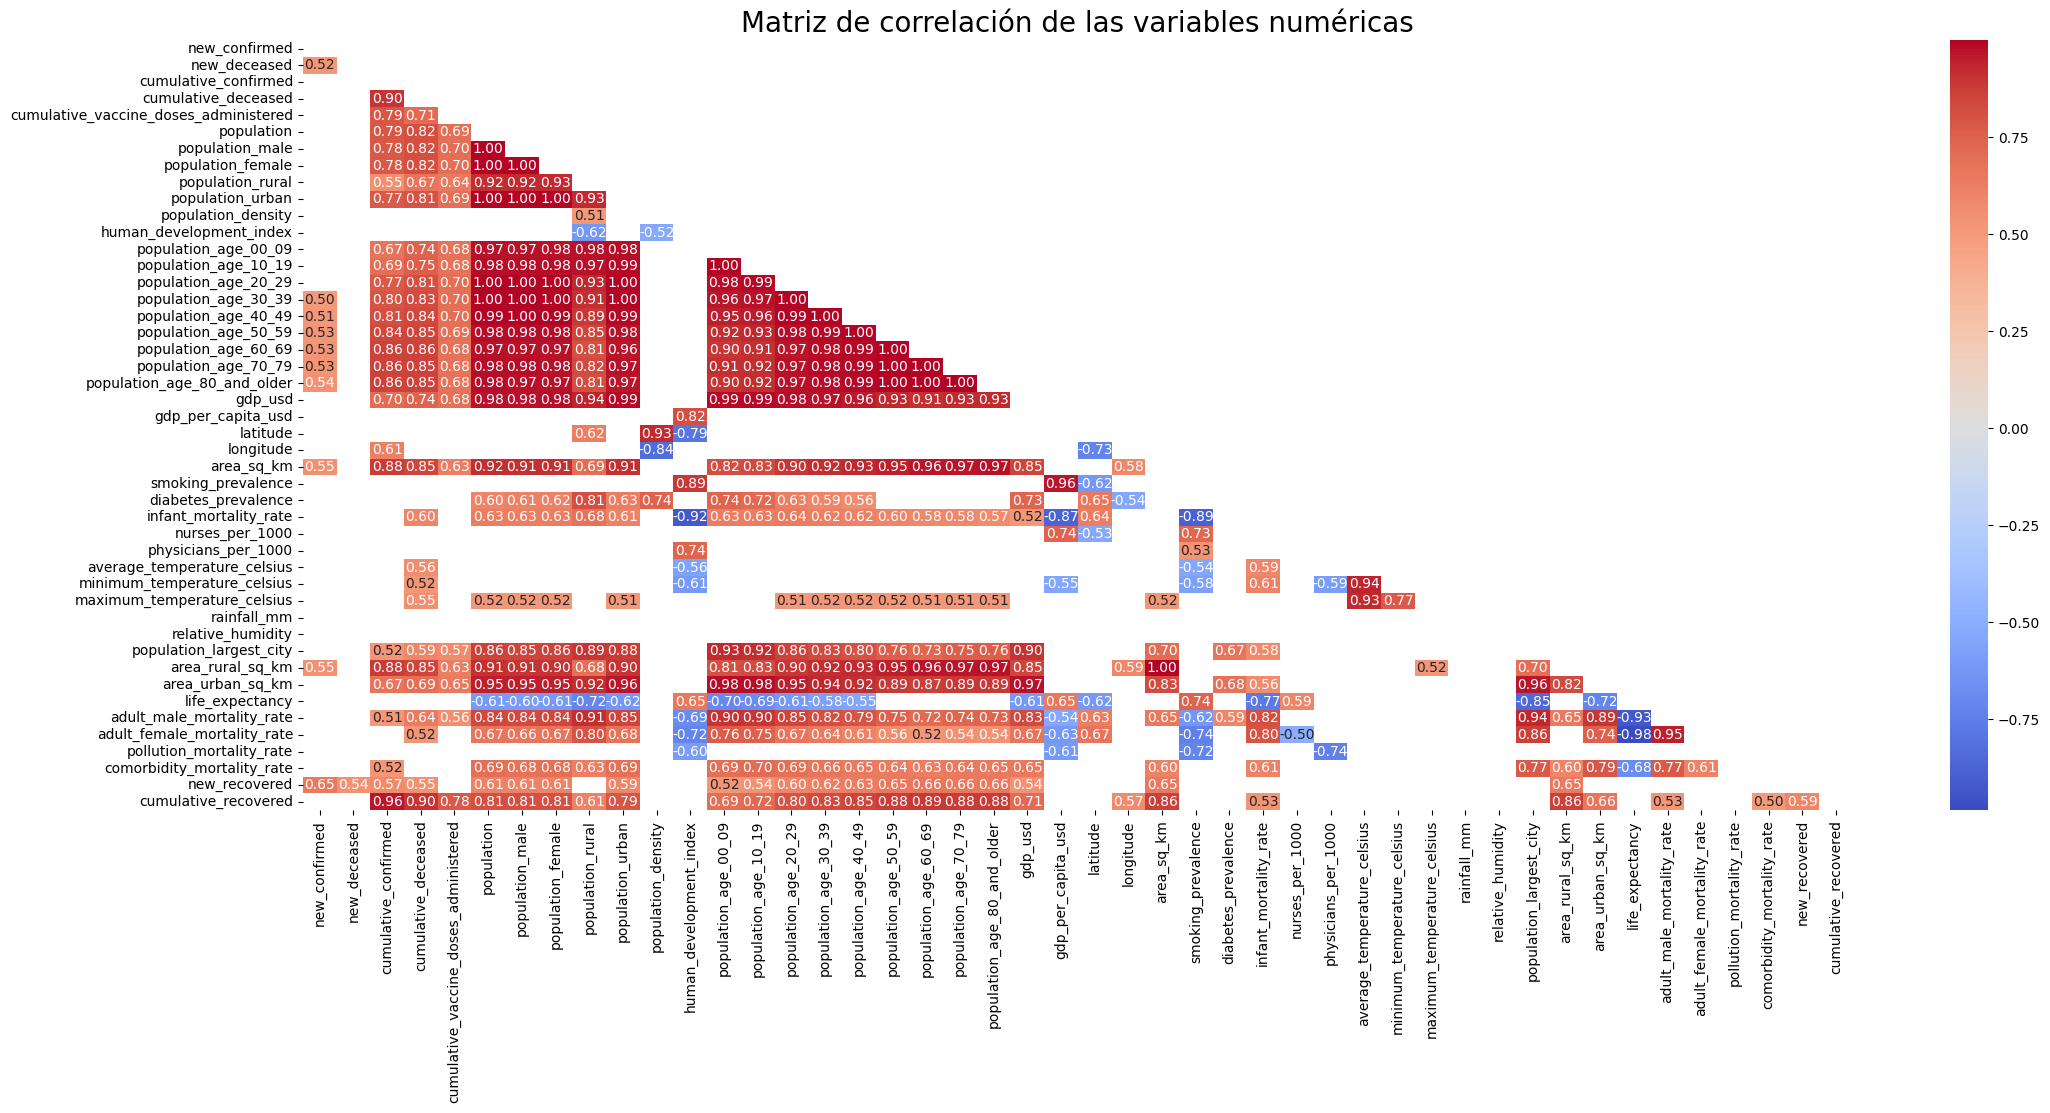

In [126]:
#Se crea la matriz de correlacion de las variables numericas
numeric_columns = data_latinoamerica_paises.select_dtypes(include=["float64","int64"]).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()
#Aqui se crea una mascara para el triangulo superior
mask= np.triu(np.ones_like(correlation_matrix, dtype=bool))
#Vamos a mostrar valores superiores a 0.5 en decir donde hay una correlacion fuerte sin embargo tambien se puede mostrar valores negativos.
correlation_matrix = correlation_matrix[abs(correlation_matrix) >abs(0.5)]

#Se crea la gráfica
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f") #annot y fmt son opciones para anotar valores en las celdas
plt.title("Matriz de correlación de las variables numéricas", fontsize=20)
plt.show()

Con esta gráfica se puede observar la correlación entre las variables cuyo valor absoluto sea mayor a 0.5. Luego de esto se podría hacer un análisis más detallado de las variables resultantes.
Sin embargo, realizaremos otras revisiones gráficas de las columnas para ver en detalle el comportamiento de los datos. Para esta primera aproximación usaremos diagramas de barras con ciclo for y seaborn.

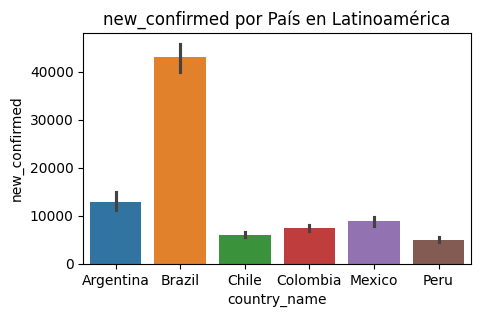

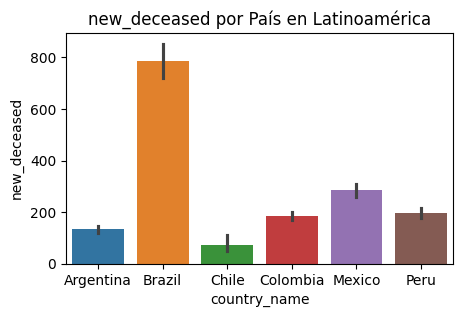

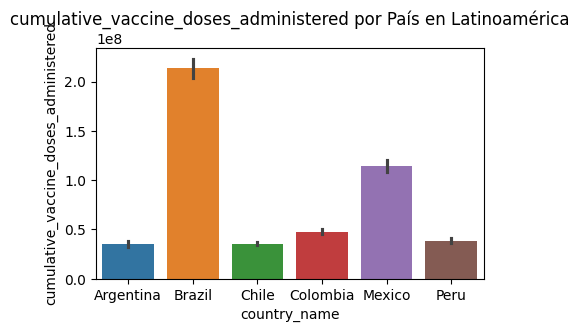

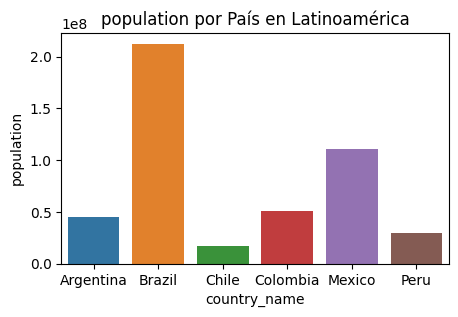

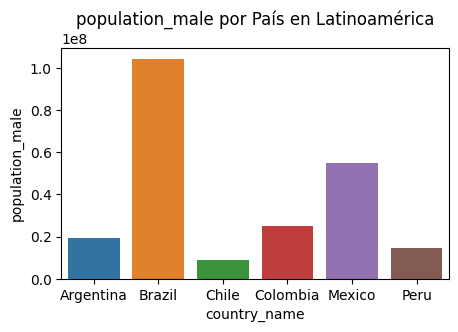

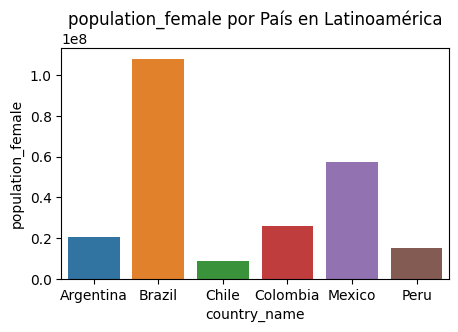

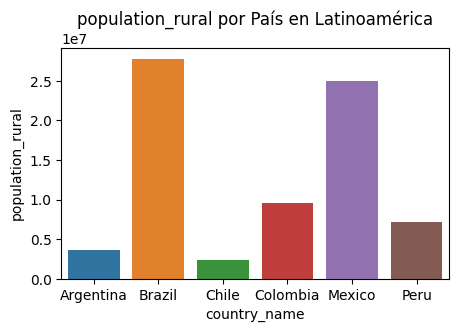

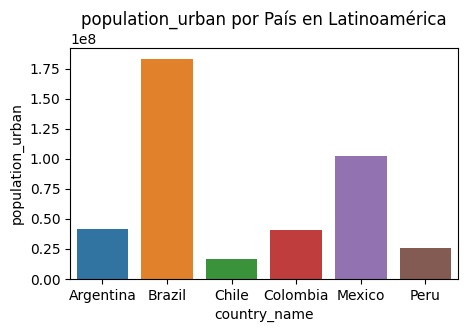

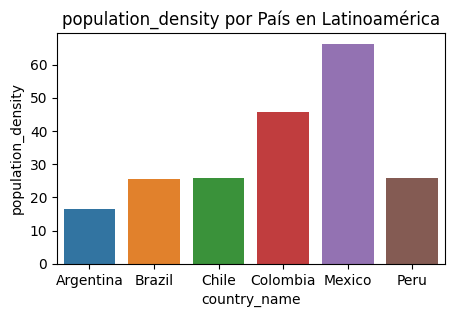

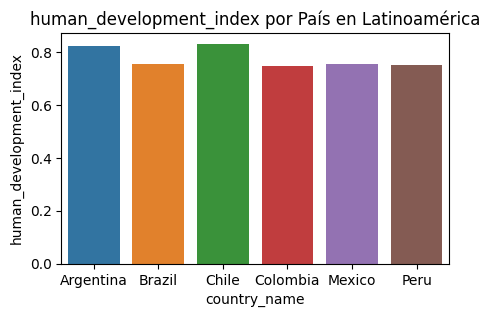

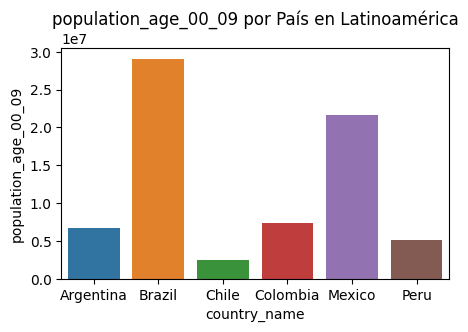

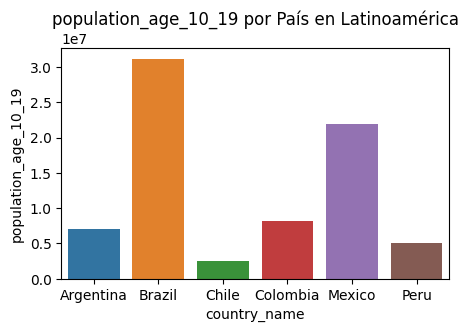

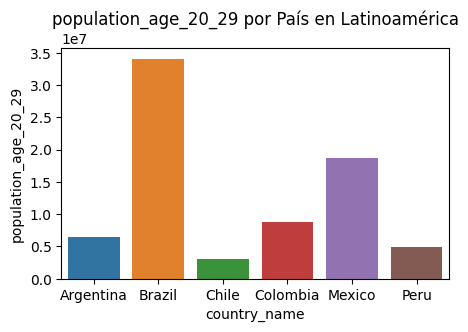

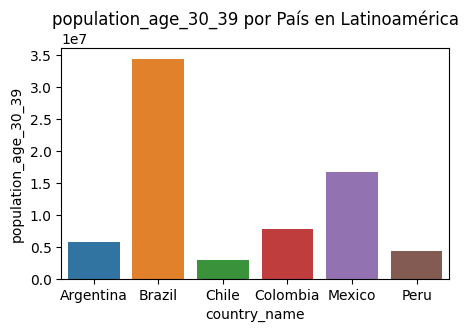

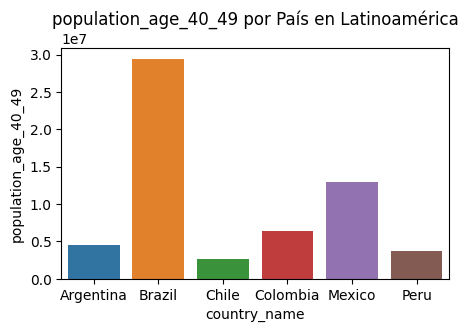

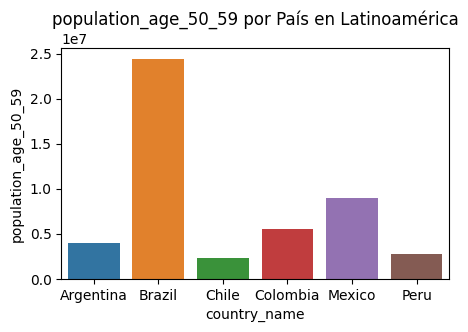

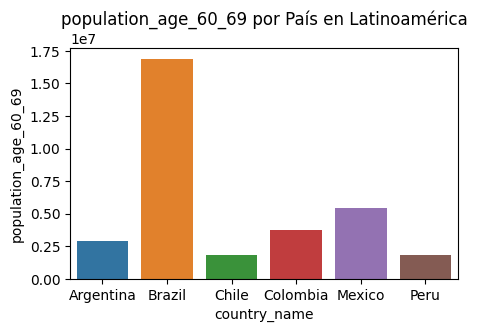

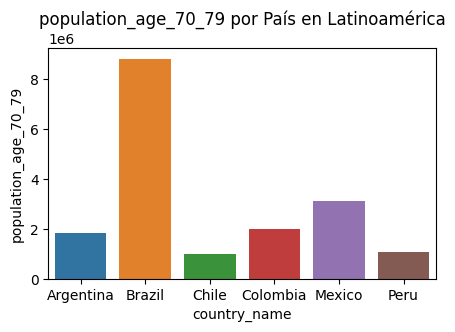

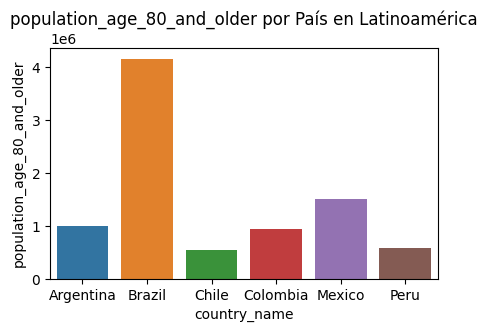

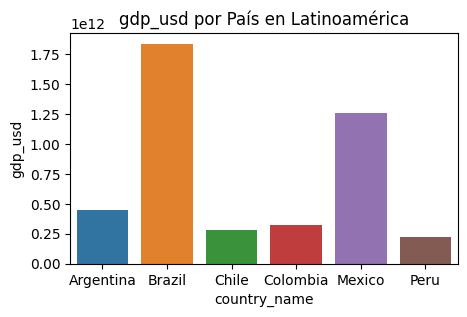

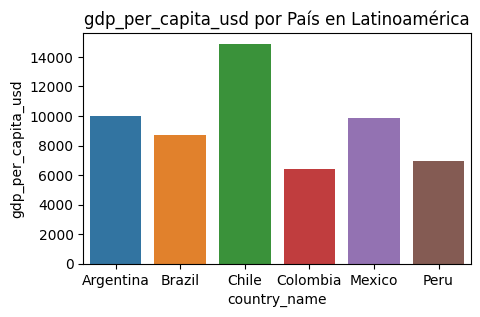

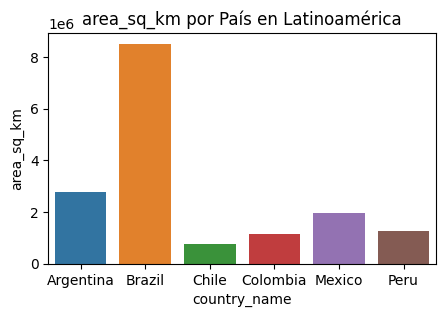

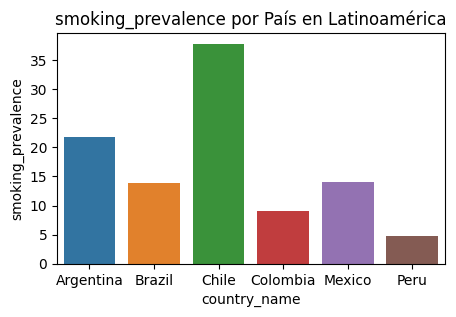

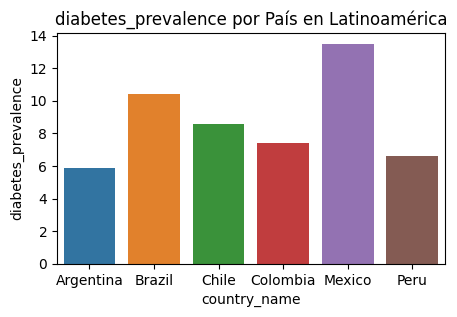

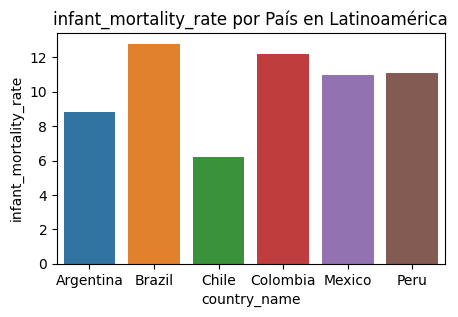

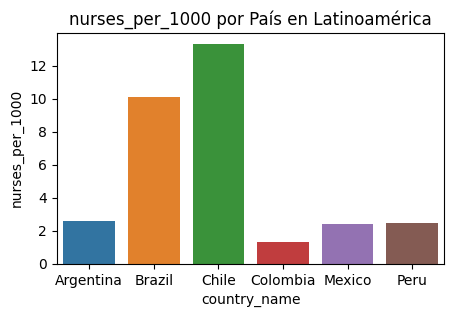

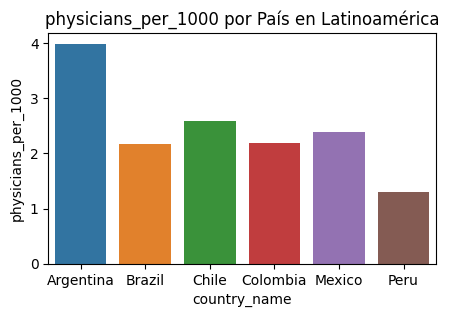

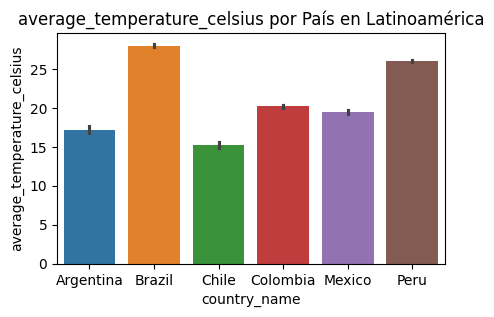

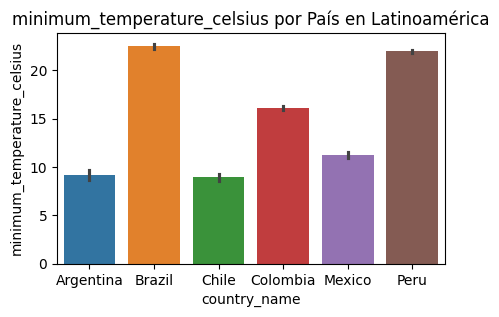

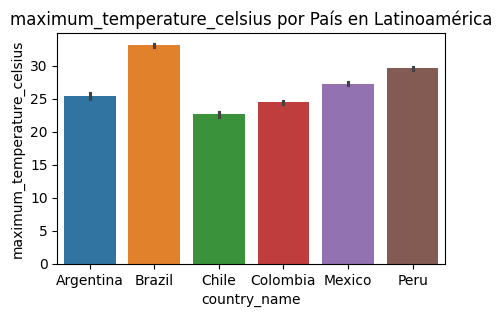

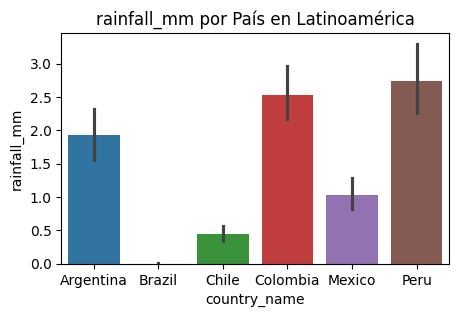

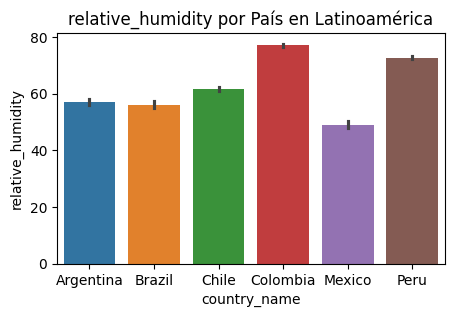

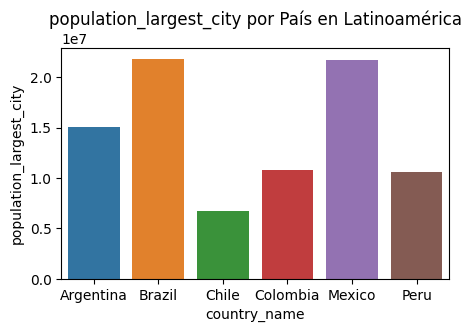

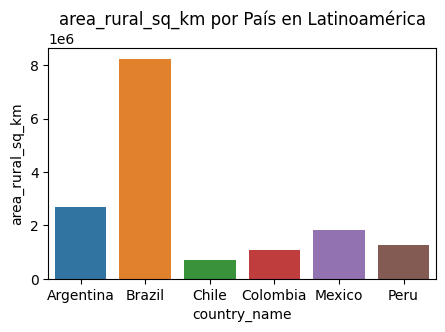

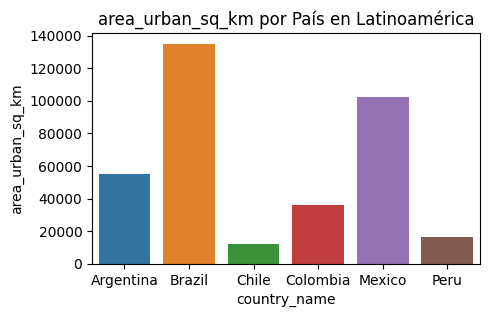

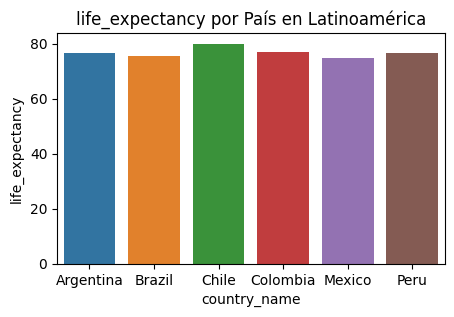

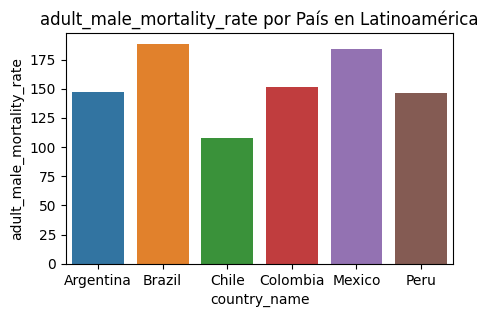

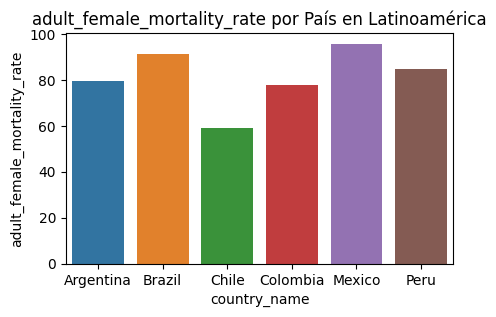

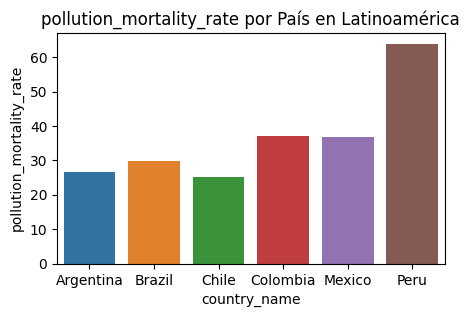

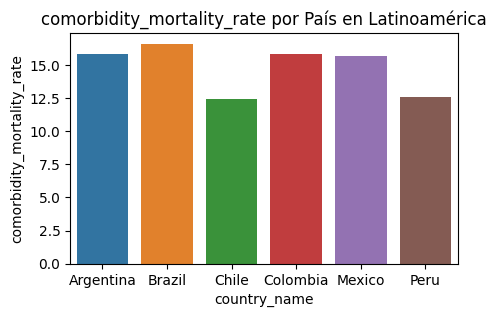

In [129]:
#Gráficos de barras de países contra el resto de variables.
for i in data_latinoamerica_paises.columns:
    if i not in["location_key", "date", "country_code", "country_name", "latitude", "longitude", "cumulative_confirmed", "cumulative_deceased", "cumulative_recovered", "cumulative_caccine_doses_administered", "new_recovered","Fecha"]:
        fig, ax = plt.subplots(figsize=(5,3))
        sns.barplot(x="country_name", y=i, data=data_latinoamerica_paises, ax=ax, hue="country_name")
        plt.title(f'{i} por País en Latinoamérica')
        plt.show()

Podemos observar que los países con mayor cantidad de nuevos confirmados serían Brasil y luego Argentina, pero en cantidad de muertes y dosis administradas Argentina queda en cuarto lugar, dado que Colombia y Mexico tienen mayores valores en estas variables. Entendemos que estos valores altos podrían deberse a que en estos países resulta haber mayor población (Brasil, Colombia y Mexico), datos que deberíamos revisar luego en mayor medida.
Además es interesante observar que los paises Chile y Argentina son los que mayor cantidad de fumadores tiene, y en Mexico y Brasil es mayor el número de personas con diabetes, interesante dato a analizar posteriormente.

Realizaremos ahora histogramas para comprender la forma y la dispersión de los datos.

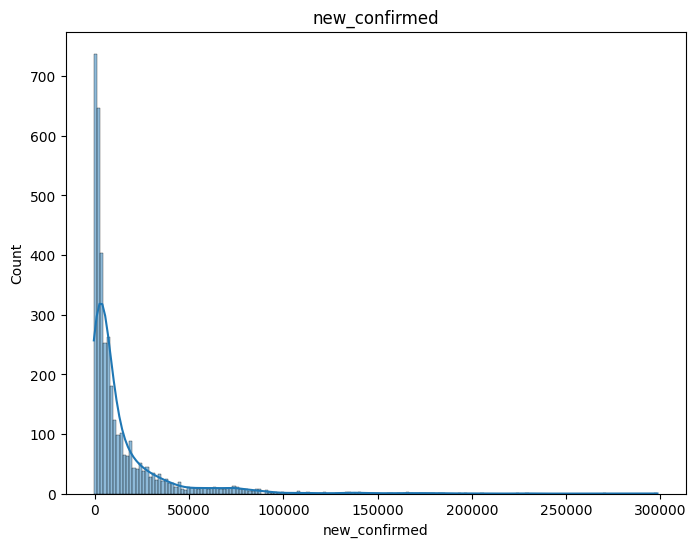

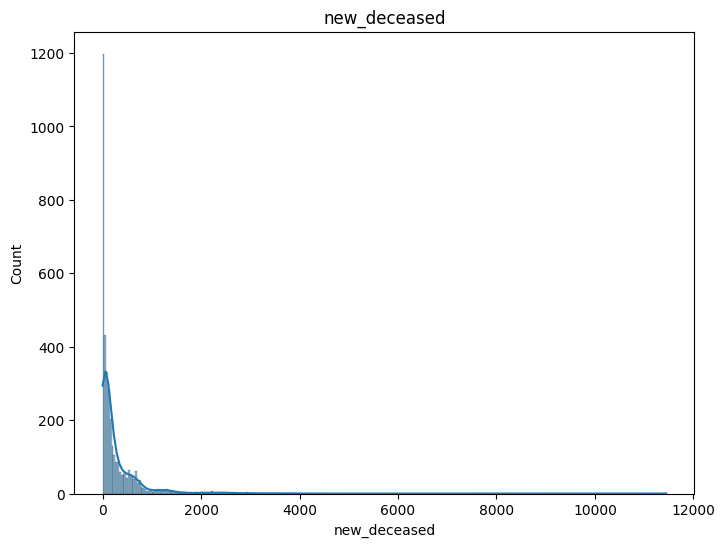

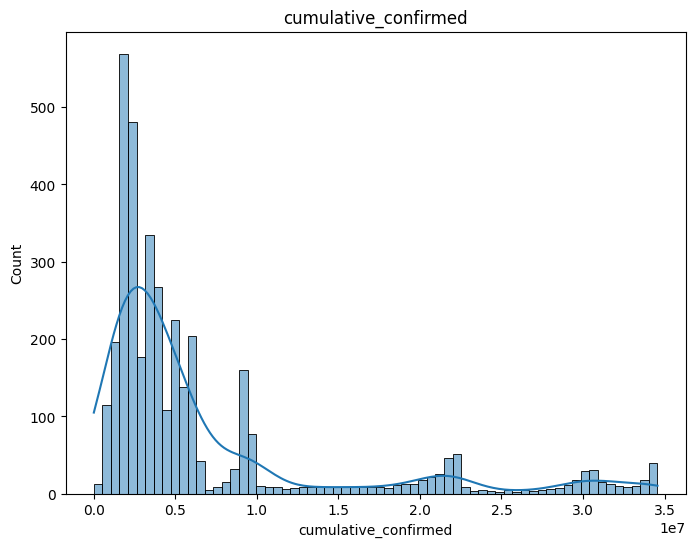

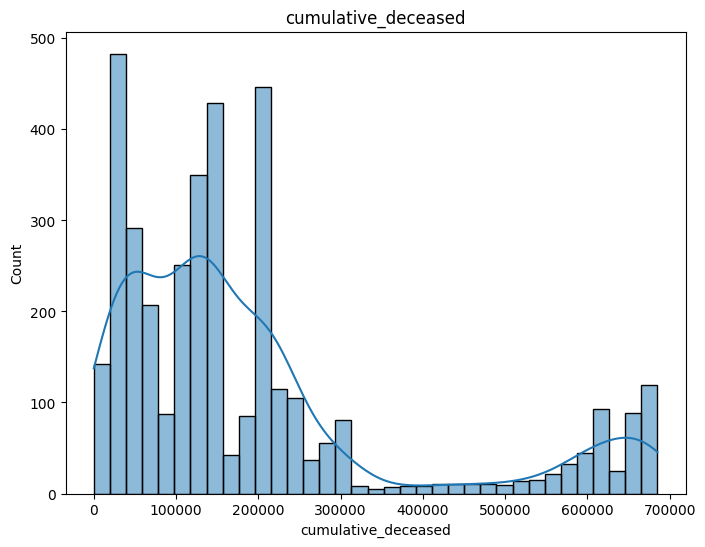

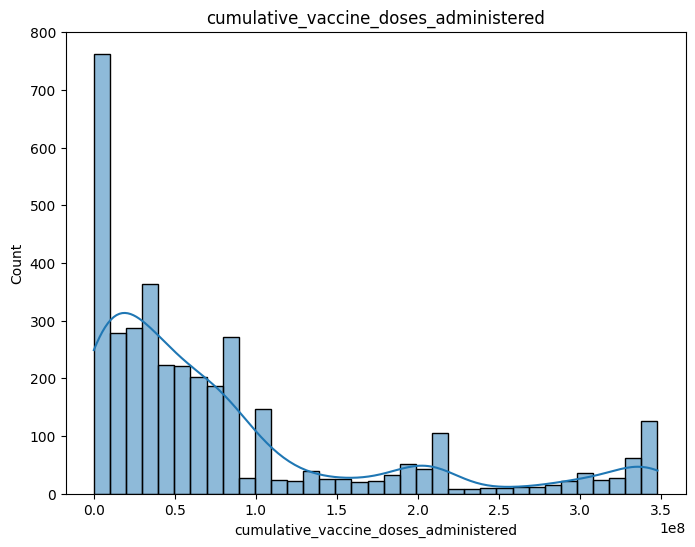

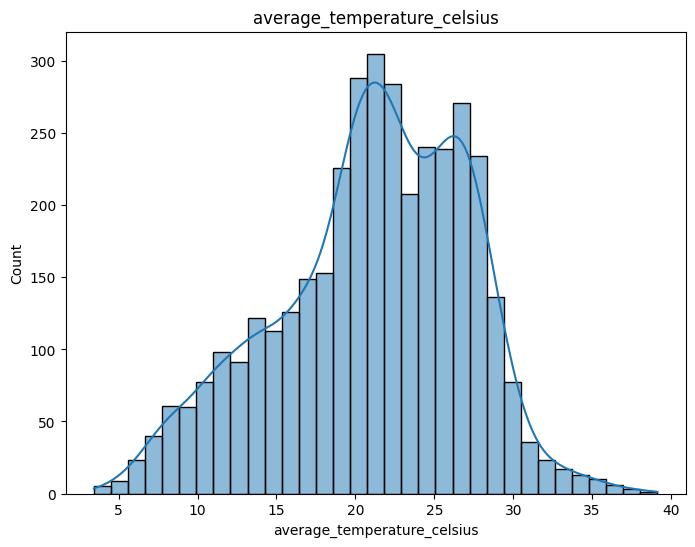

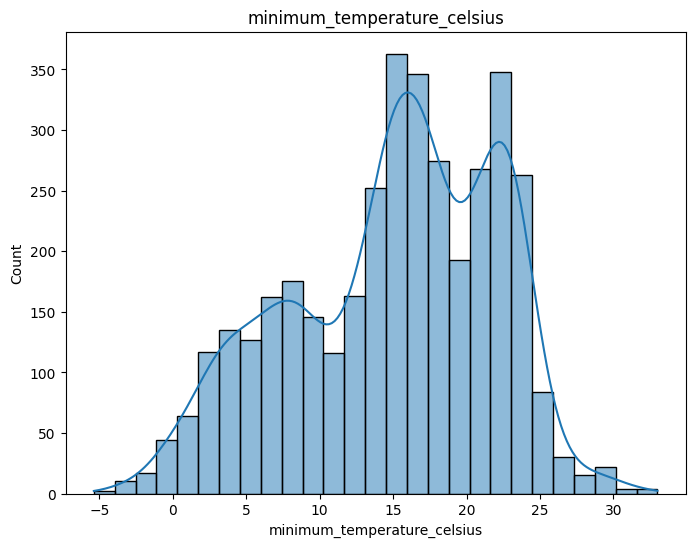

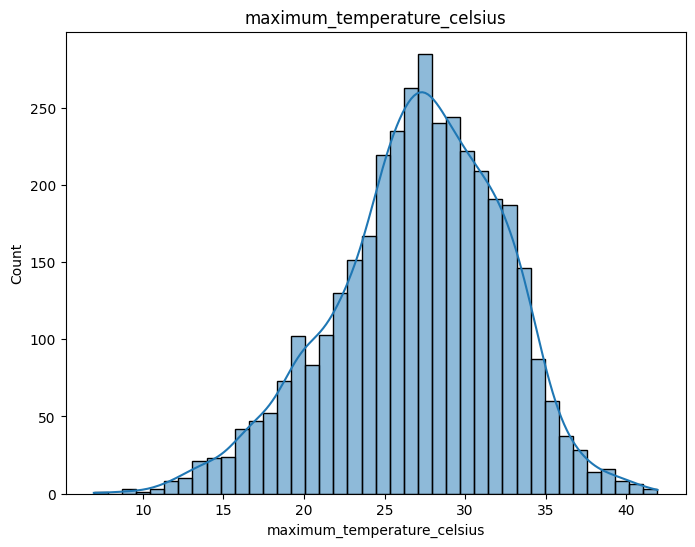

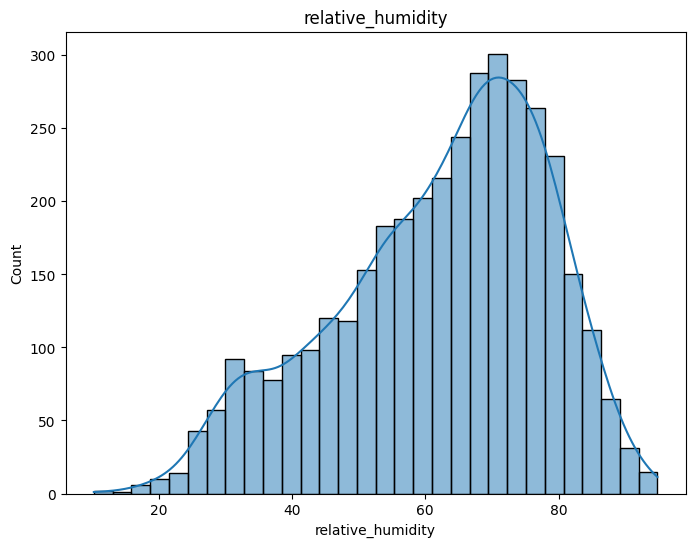

In [16]:
lista_columnas_6= ["new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased", "cumulative_vaccine_doses_administered", "average_temperature_celsius", "minimum_temperature_celsius", "maximum_temperature_celsius", "relative_humidity"]
#Crear histogramas de las variables numericas
for i in data_latinoamerica_paises[lista_columnas_6]:
    fig, ax= plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_paises[i], kde=True) #kde muestra la distribucion probabilistica que tiene la columna
    plt.title(i)
    plt.show()

Se analizará un análisis entre la temperatura promedio y nuevos confirmados para entender el comportamiento entre esta relación.

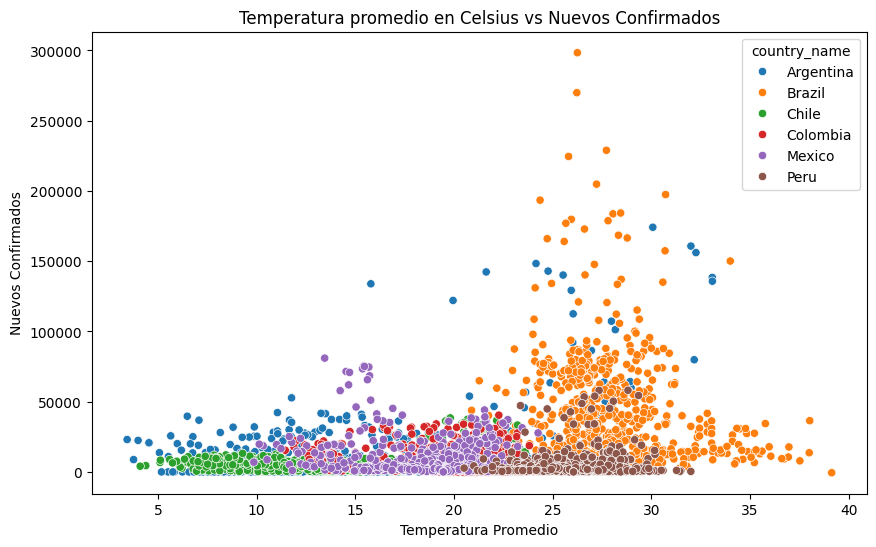

In [130]:
#Grafica de average_temperature_celsius vs new_confirmed
fig, ax= plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_confirmed", data=data_latinoamerica_paises, hue="country_name")
plt.title("Temperatura promedio en Celsius vs Nuevos Confirmados")
plt.ylabel("Nuevos Confirmados")
plt.xlabel("Temperatura Promedio")
plt.show()

Se observa que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo si en otros donde hay una relacion de mayor cantidad en ciertas temperaturas.
Analizaremos si la temperatura promedio se relaciona con la cantidad de muertes.

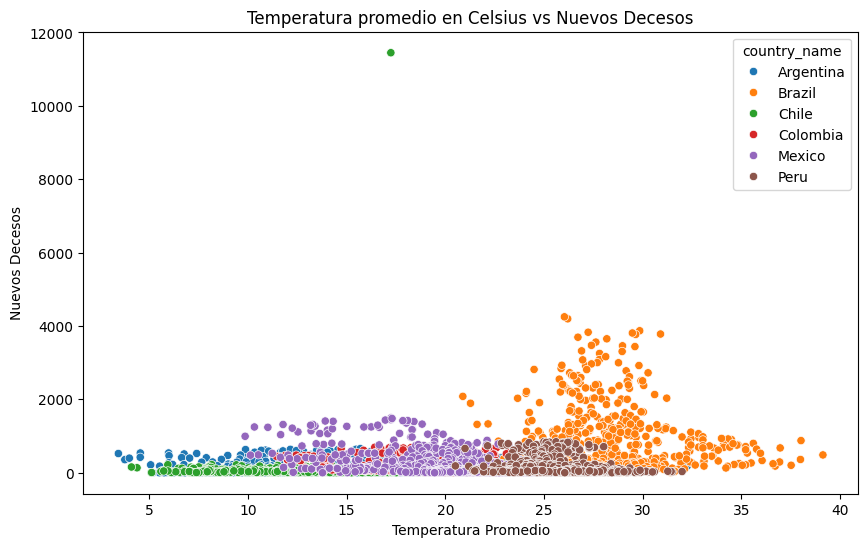

In [131]:
#Grafica de average_temperature_celsius vs new_deceased
fig, ax= plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y="new_deceased", data=data_latinoamerica_paises, hue="country_name")
plt.title("Temperatura promedio en Celsius vs Nuevos Decesos")
plt.ylabel("Nuevos Decesos")
plt.xlabel("Temperatura Promedio")
plt.show()

Se observa tambien un comportamiento similar, donde en Brasil se puede ver mayor cantidad de muertes en un rango de temperaturas. Además observamos un valor atipico dentro de Chile, donde deberíamos luego analizar si eliminar este valor, cambiarlo o si es un dato que es correcto

<function matplotlib.pyplot.show(close=None, block=None)>

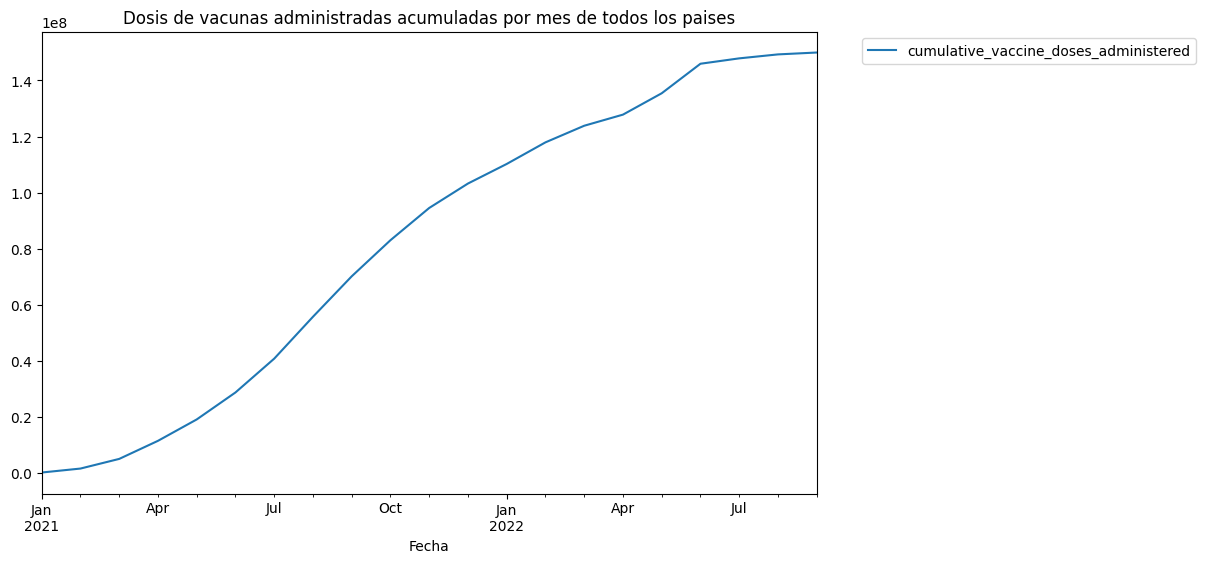

In [132]:
#Grafica de los valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax=plt.subplots(figsize=(10,6))
#Usamos promedio para evitar los datos vacíos y no tener una caída en la línea y que se pierda la temporalidad de la gráfica
data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left") #Para mostrar el cuadro informativo de la linea fuera del grafico
plt.title("Dosis de vacunas administradas acumuladas por mes de todos los paises")
plt.xlabel("Fecha")
plt.show

Se observa que el crecimiento fue lineal en casi todo el período, salvo que luego de junio de 2022 este crecimiento se mantiene, por lo que tal vez quiere decir que ya a esta época la mayoria de la población ya está vacunada o bien dejaron de vacunarse en cantidad, pudiendo deberse a falta de vacunas por ejemplo. Revisaremos como tuvo incidencia pero diferenciando en cada país las dosis acumuladas.

<function matplotlib.pyplot.show(close=None, block=None)>

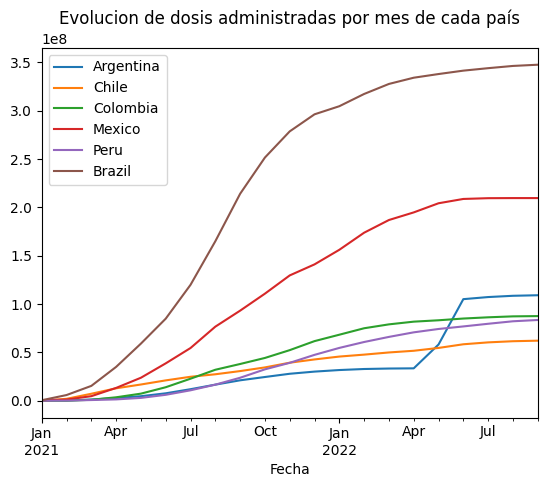

In [133]:
#Grafica de las dosis administradas por mes por pais
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot()

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left") #Para mostrar el cuadro informativo de la linea fuera del grafico
plt.legend(paises_seleccionados)
plt.xlabel("Fecha")
plt.title("Evolucion de dosis administradas por mes de cada país")
plt.show

Se observa tambien un crecimiento hasta octubre de 2022, siendo luego de este mes un crecimiento en menor medida. Si puede diferenciarse entre abril y junio de 2022 en Argentina un alto crecimiento en las dosis suministradas y luego ese valor se estanca.

<function matplotlib.pyplot.show(close=None, block=None)>

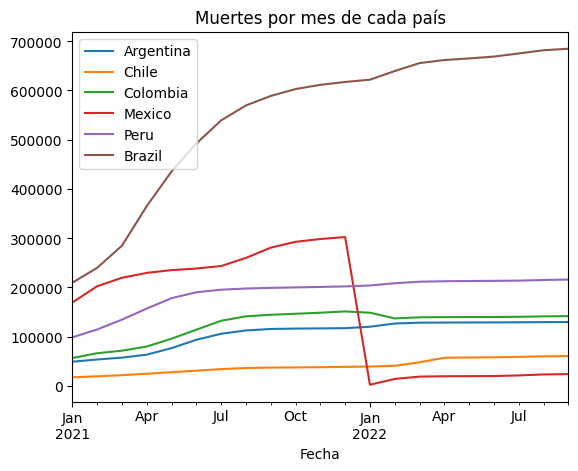

In [134]:
#Grafica de las muertes por mes por pais
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot()

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left") #Para mostrar el cuadro informativo de la linea fuera del grafico
plt.legend(paises_seleccionados)
plt.title("Muertes por mes de cada país")
plt.xlabel("Fecha")
plt.show

Se ve que en Mexico hay una caida importante entre diciembre y enero de 2022 en las muertes, podría ser un objeto de mayor análisis. Podría deberse el mismo al tratamiento de los nulos que se transformaron en 0.

<function matplotlib.pyplot.show(close=None, block=None)>

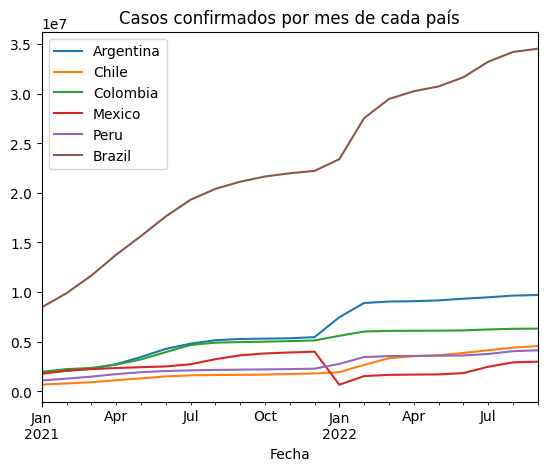

In [135]:
#Grafica de los casos confirmados por mes por mes por pais
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_confirmed"].plot()

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left") #Para mostrar el cuadro informativo de la linea a la izquierda del grafico
plt.legend(paises_seleccionados)
plt.title("Casos confirmados por mes de cada país")
plt.xlabel("Fecha")
plt.show

Se confirma que el país con mas casos es Brasil, seguido por Mexico, Colombia, Argentina, Peru y Chile. Ademas, en Argentina hubo un aumento entre los meses de diciembre y febrero, podría deberse a épocas de fiestas de fin de año. A su vez en el mismo período hay una caída en México, Podría deberse el mismo al tratamiento de los nulos que se transformaron en 0.

<function matplotlib.pyplot.show(close=None, block=None)>

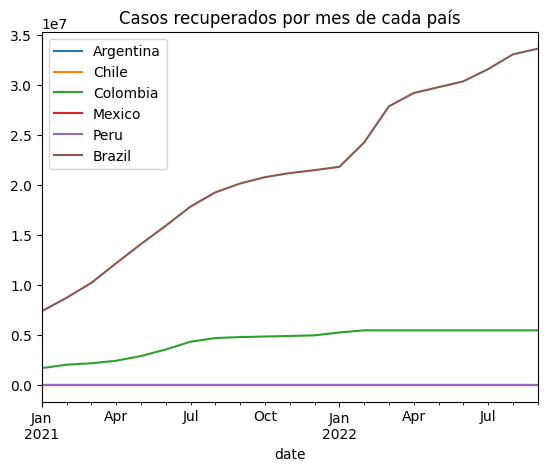

In [28]:
#Grafica de las recuperaciones de casos por mes por pais
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_recovered"].plot()

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left") #Para mostrar el cuadro informativo de la linea fuera del grafico
plt.legend(paises_seleccionados)
plt.title("Casos recuperados por mes de cada país")
plt.show

Vemos solo datos en Brasil y Colombia dado que no existia tal información para el resto de los países.

<function matplotlib.pyplot.show(close=None, block=None)>

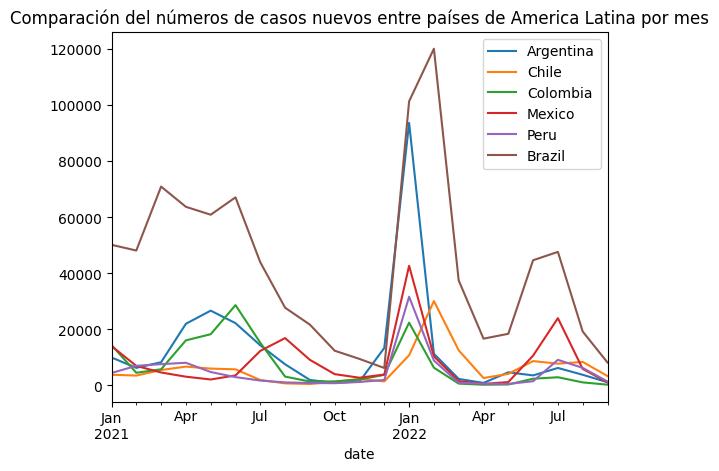

In [29]:
#Grafica de la comparacion de numero de casos nuevos por mes por pais
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["new_confirmed"].plot()

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left") #Para mostrar el cuadro informativo de la linea fuera del grafico
plt.legend(paises_seleccionados)
plt.title("Comparación del números de casos nuevos entre países de America Latina por mes")
plt.show

Tenemos un pico en Enero de 2022, que puede verse en mayor medida en Brasil y Argentina.


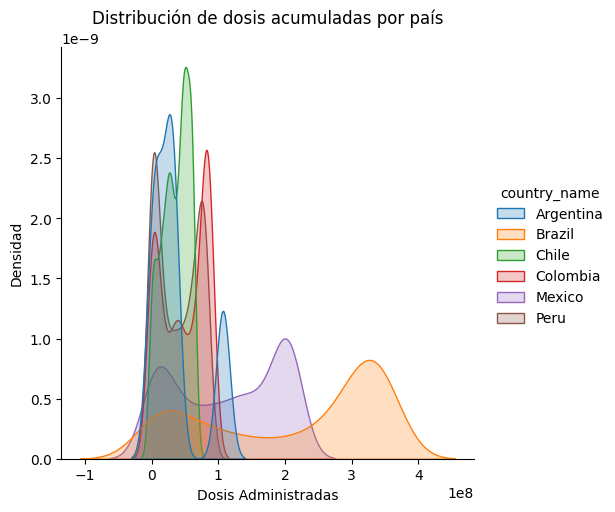

In [136]:
sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title("Distribución de dosis acumuladas por país")
plt.ylabel("Densidad")
plt.xlabel("Dosis Administradas")
plt.show()

Puede observarse que el país que peor administró sus dosis fue Brasil, seguido de Mexico, Colombia, Argentinam Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos países ademas de ser desproporcionada la cantidad de vacunas administradas.

De  los paises que mejor manejo la pandemia fue Chile, seguido por Peru, puede verse que la cantidad de muertes y casos confirmados es menor en estos países además de no ser tan desproporcionada la cantidad de vacunas administradas.

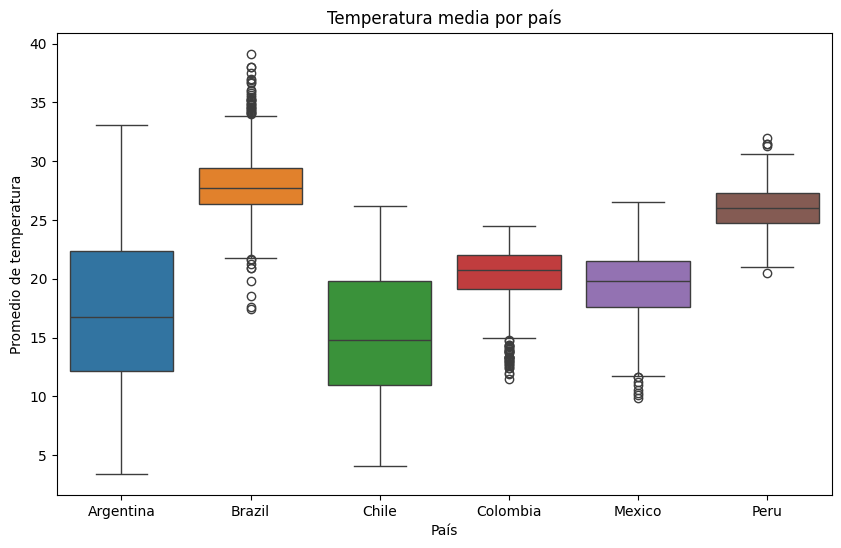

In [137]:
#Boxplot de temperatura media de cada país
fig, ax= plt.subplots(figsize=(10,6))
sns.boxplot(x="country_name", y="average_temperature_celsius", data=data_latinoamerica_paises, hue="country_name")
plt.title("Temperatura media por país")
plt.xlabel("País")
plt.ylabel("Promedio de temperatura")
plt.show()

Puede observarse que en Argentina hay un mayor rango de temperaturas, en Brasil se ven valores atipicos segun la estadistica tanto en menor y mayor temperatura promedio, en Colombia y Mexico se ven valores atipicos por debajo de la temperatura.
Chile tiene un rango de diferente temperatura y podría haber afectado a la cantidad de casos confirmados y muertes.
Esto poco a poco nos lleva a concluir que los países donde se podría crear los nuevos centros serían donde hay mayor cantidad de casos confirmados y muertes, ya que es donde se necesita mas ayuda.

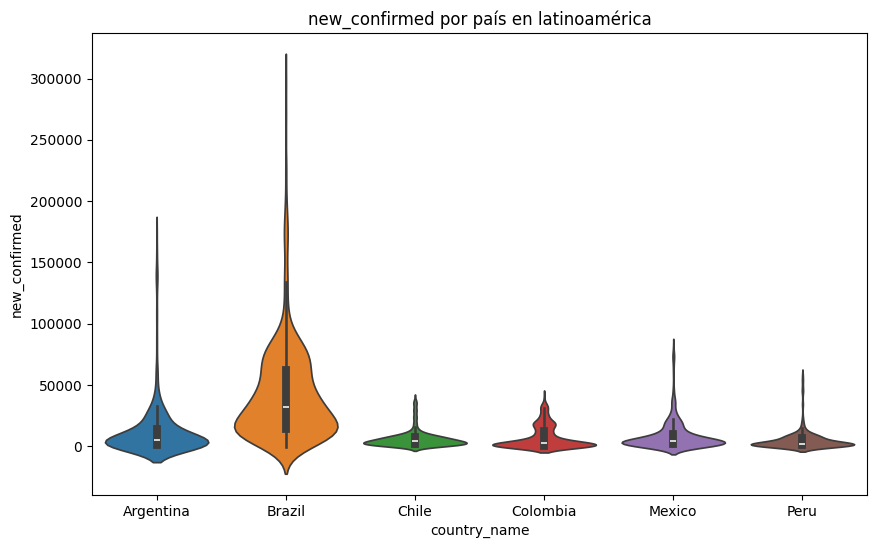

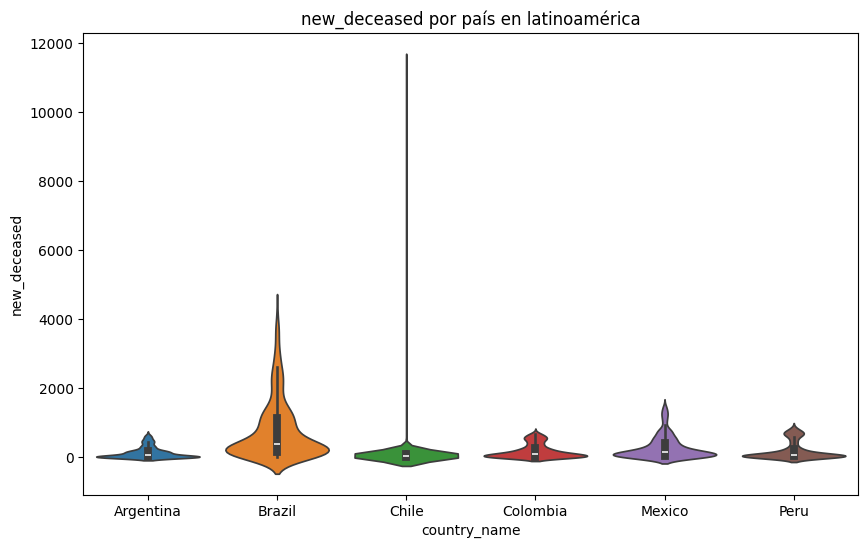

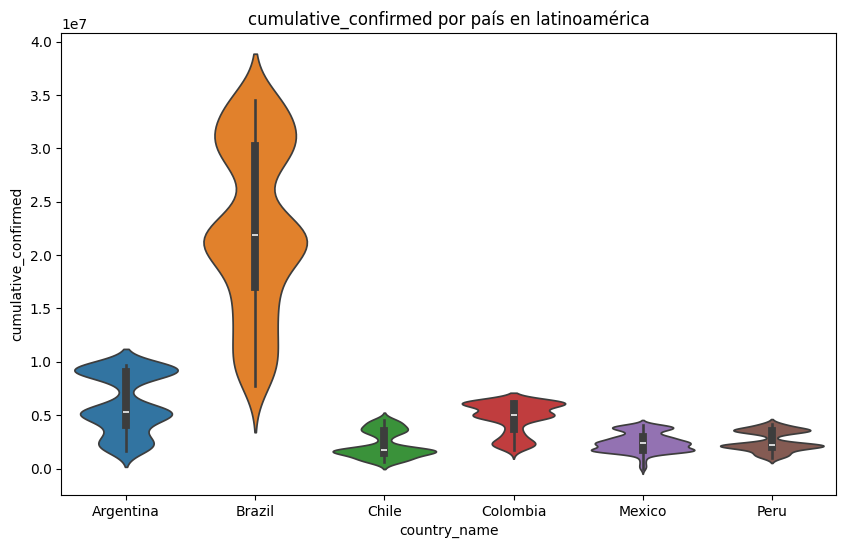

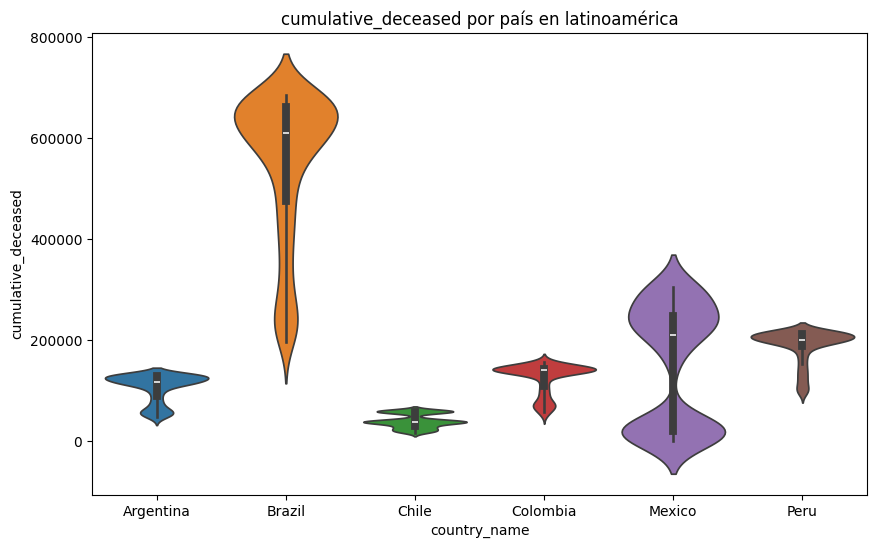

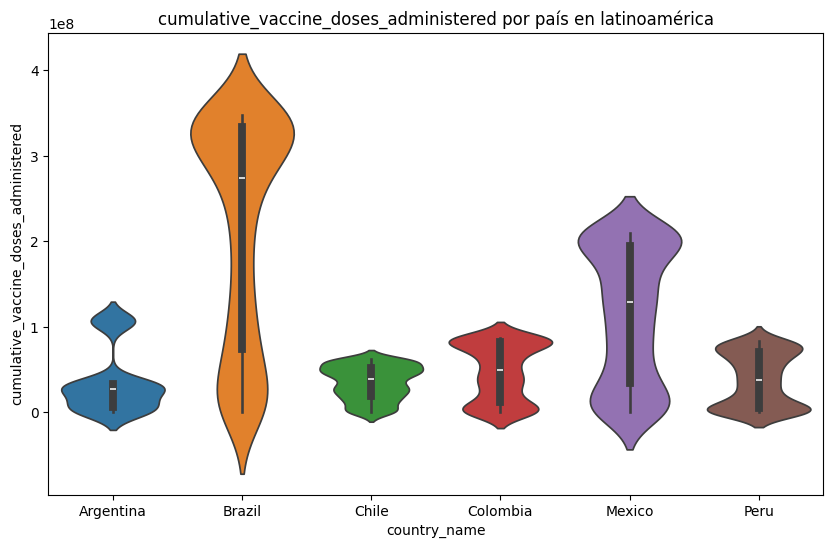

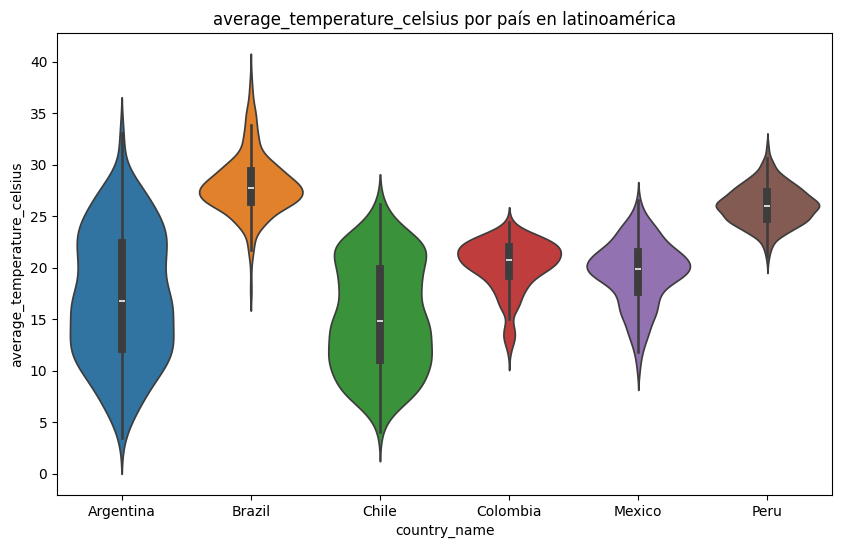

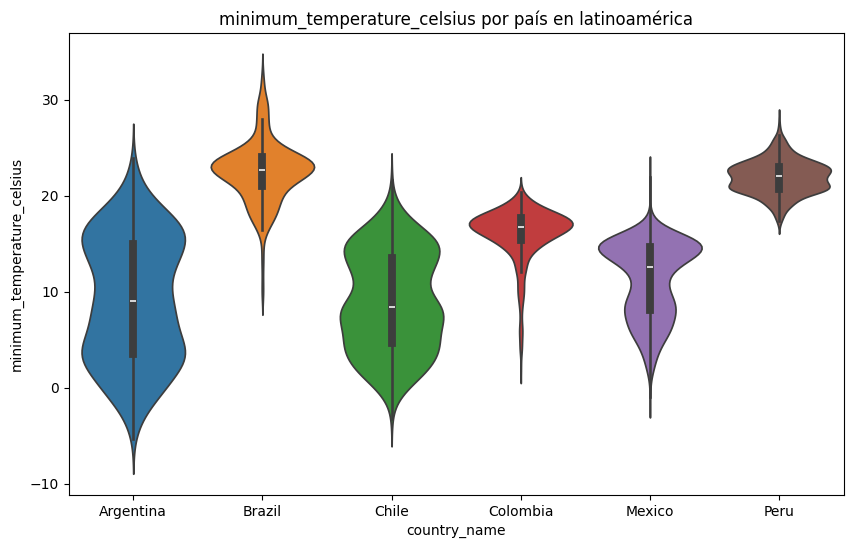

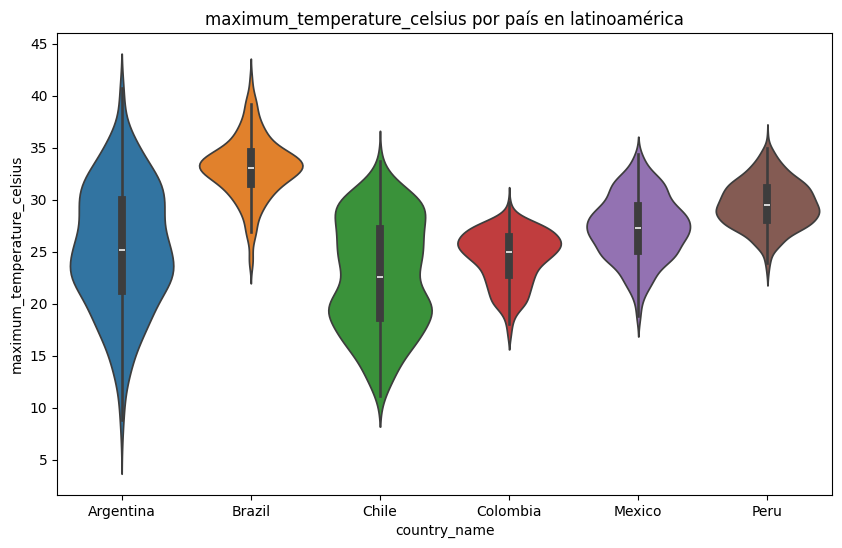

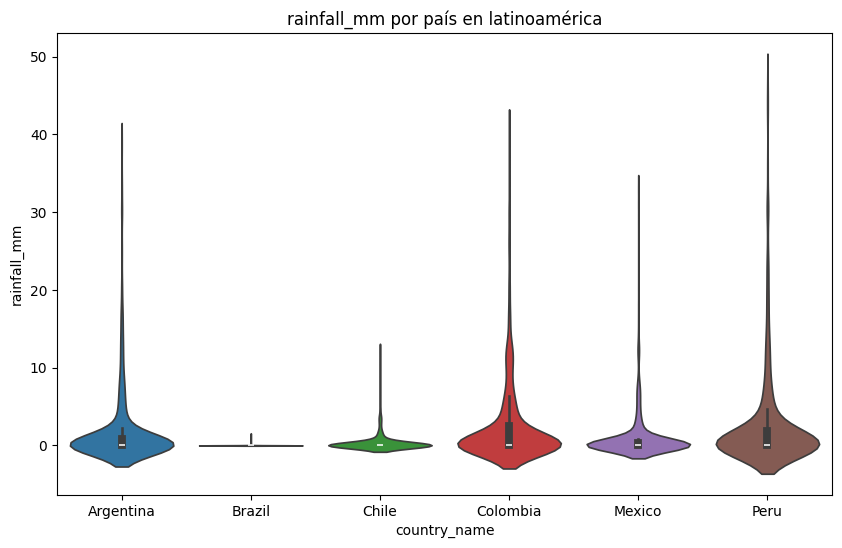

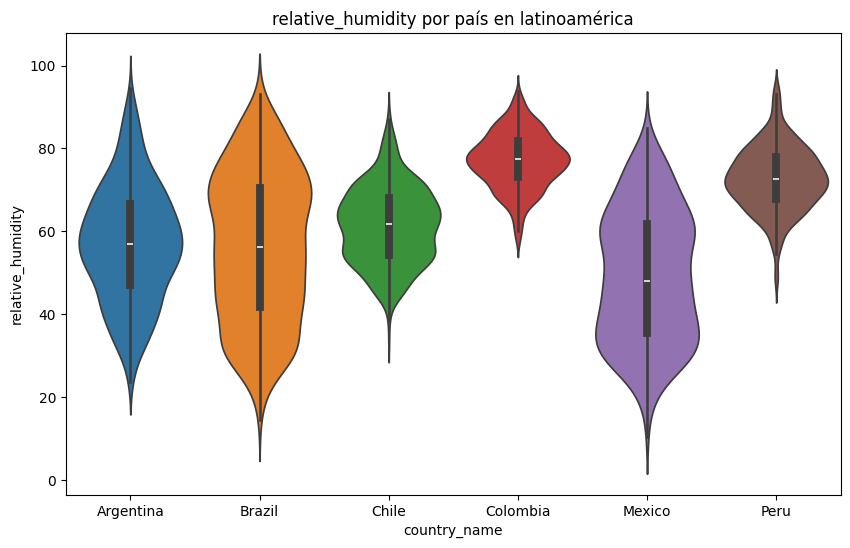

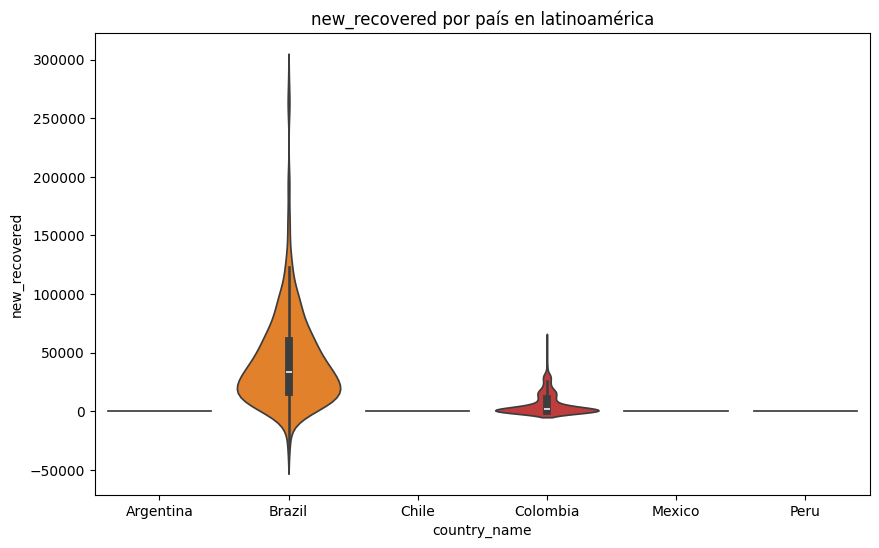

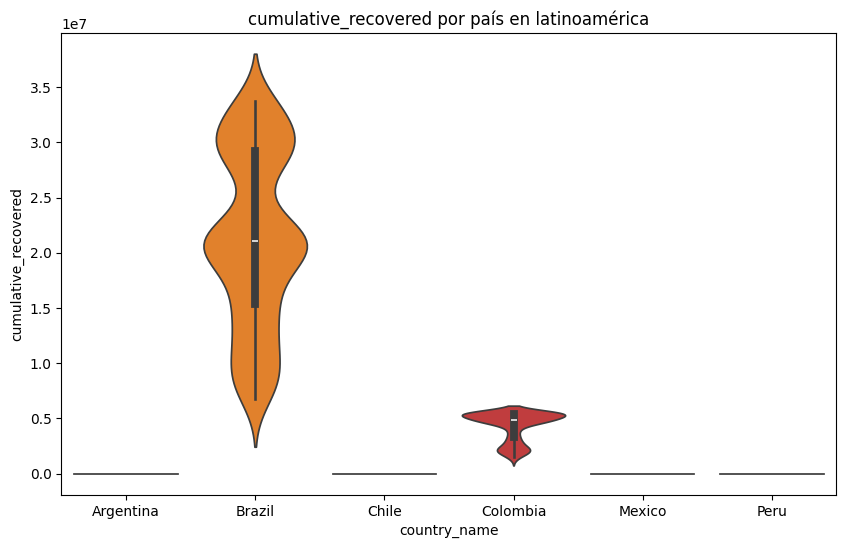

In [38]:
#Se crea un dataframe con las columnas que tienen mas de 6 valores unicos porque son las que tienen valores diferentes para cada país
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in["location_key","date","country_code","latitude","longitude","country_name"]:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)
#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append("country_name")

#se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

#vionlinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ["location_key","date","country_code","latitude","longitude","country_name"]:
        fog, ax= plt.subplots(figsize=(10,6))
        sns.violinplot(x="country_name", y=i, data=data_latinoamerica_paises_mayores_6, hue="country_name")
        plt.title(f"{i} por país en Latinoamérica")
        plt.show()

Se analizaran luego la distribucion de la poblacion por grupos de edad

In [39]:
age_columns =['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

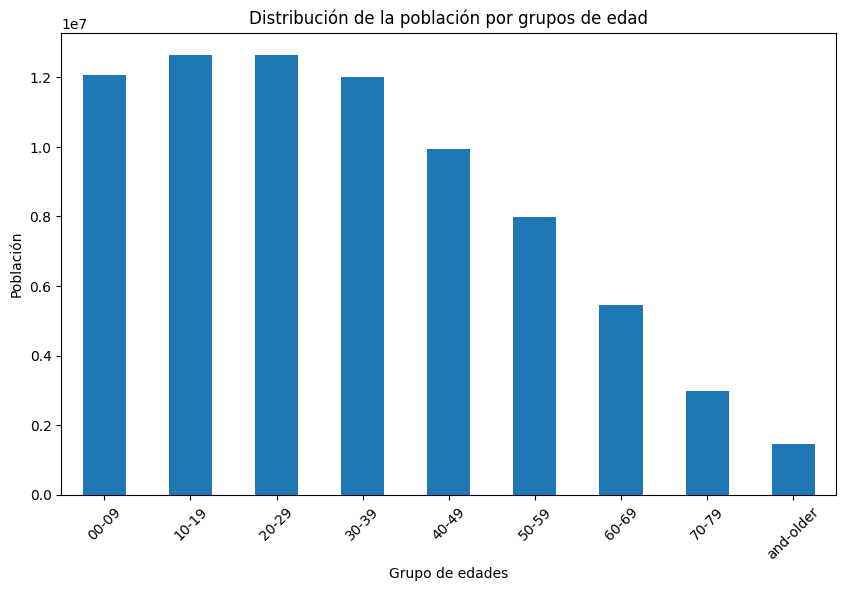

In [42]:
#calculamos la distribucion de poblacion por grupos de edad
age_distribution=data_latinoamerica_paises[age_columns].mean()

plt.figure(figsize=(10,6))
age_distribution.plot(kind="bar", stacked=True)
plt.xlabel("Grupo de edades")
plt.ylabel("Población")
plt.title("Distribución de la población por grupos de edad")
plt.xticks(range(len(age_columns)), [col.split("_")[-2] + "-" + col.split("_")[-1] for col in age_columns], rotation=45) #para las leyendas en el eje x

plt.show()

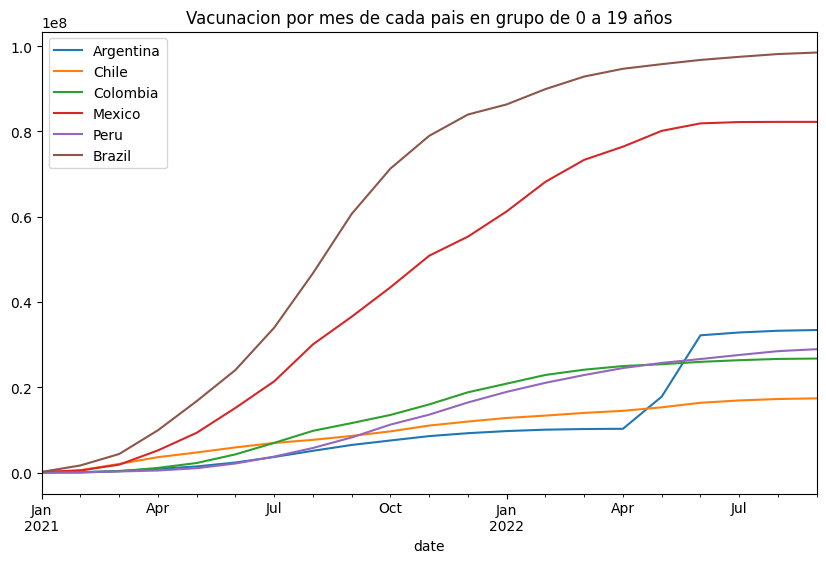

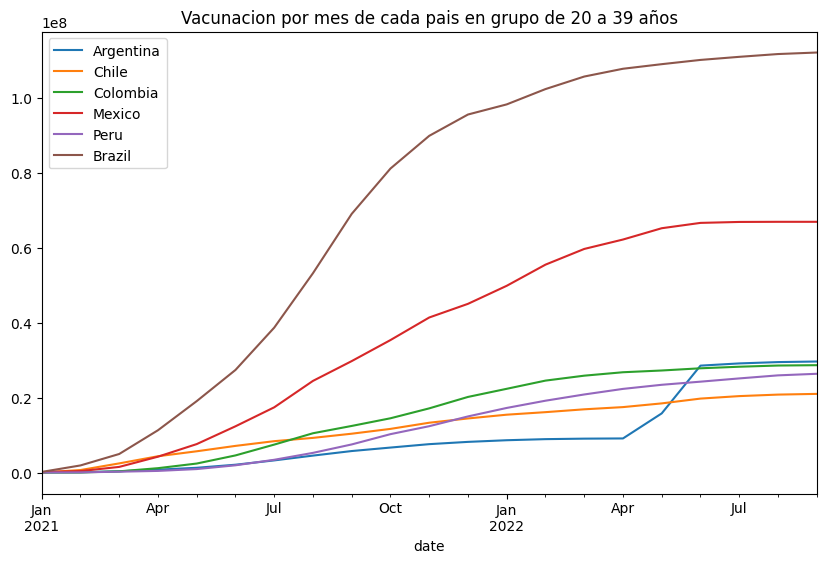

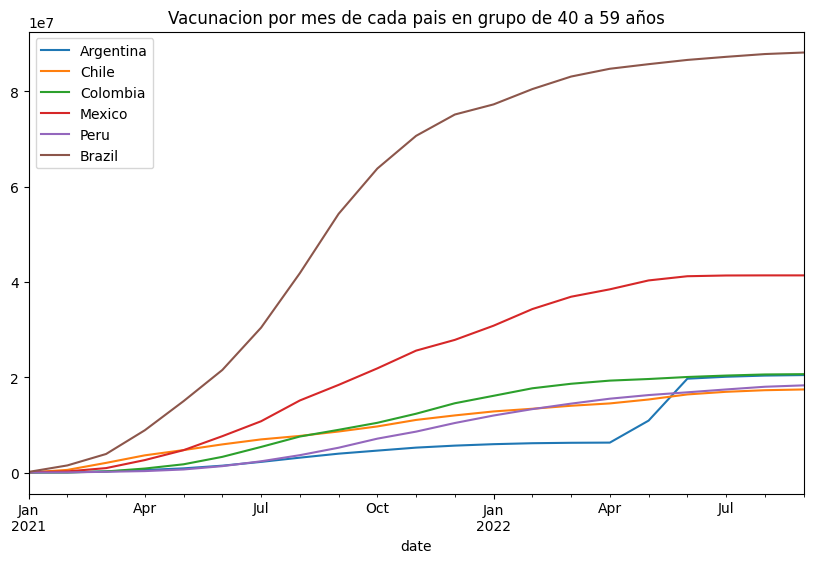

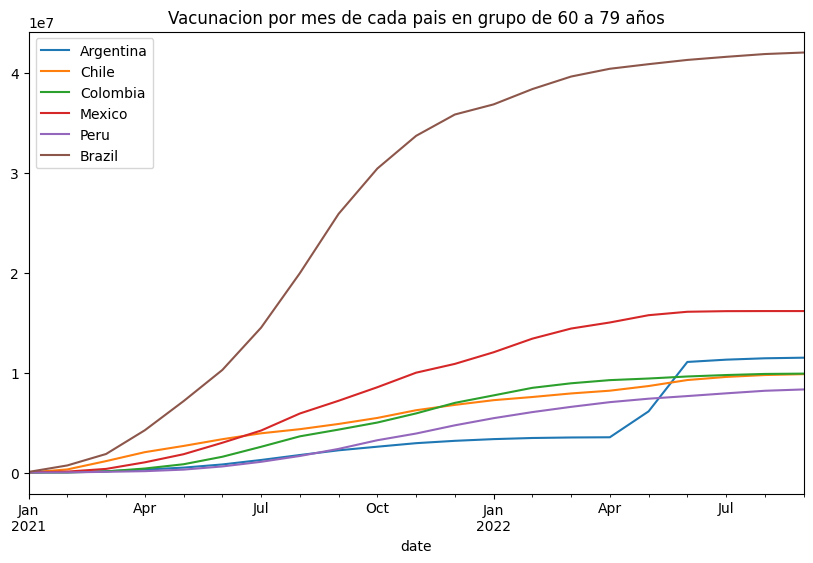

In [48]:
#grupo etareo mas vacunado
data_latinoamerica_paises["population_age_00_19"]=data_latinoamerica_paises["population_age_00_09"]+data_latinoamerica_paises["population_age_10_19"]
data_latinoamerica_paises["population_age_20_39"]=data_latinoamerica_paises["population_age_20_29"]+data_latinoamerica_paises["population_age_30_39"]
data_latinoamerica_paises["population_age_40_59"]=data_latinoamerica_paises["population_age_40_49"]+data_latinoamerica_paises["population_age_50_59"]
data_latinoamerica_paises["population_age_60_79"]=data_latinoamerica_paises["population_age_60_69"]+data_latinoamerica_paises["population_age_70_79"]
data_latinoamerica_paises["population_age_80_and_older"]=data_latinoamerica_paises["population_age_80_and_older"]

data_latinoamerica_paises["population_age_00_19_vacunados"]=data_latinoamerica_paises["cumulative_vaccine_doses_administered"]*data_latinoamerica_paises["population_age_00_19"]/data_latinoamerica_paises["population"]
data_latinoamerica_paises["population_age_20_39_vacunados"]=data_latinoamerica_paises["cumulative_vaccine_doses_administered"]*data_latinoamerica_paises["population_age_20_39"]/data_latinoamerica_paises["population"]
data_latinoamerica_paises["population_age_40_59_vacunados"]=data_latinoamerica_paises["cumulative_vaccine_doses_administered"]*data_latinoamerica_paises["population_age_40_59"]/data_latinoamerica_paises["population"]
data_latinoamerica_paises["population_age_60_79_vacunados"]=data_latinoamerica_paises["cumulative_vaccine_doses_administered"]*data_latinoamerica_paises["population_age_60_79"]/data_latinoamerica_paises["population"]
data_latinoamerica_paises["population_age_80_and_older_vacunados"]=data_latinoamerica_paises["cumulative_vaccine_doses_administered"]*data_latinoamerica_paises["population_age_80_and_older"]/data_latinoamerica_paises["population"]

data_latinoamerica_paises["population_age_00_19_vacunados"]=data_latinoamerica_paises["population_age_00_19_vacunados"].fillna(0)
data_latinoamerica_paises["population_age_20_39_vacunados"]=data_latinoamerica_paises["population_age_20_39_vacunados"].fillna(0)
data_latinoamerica_paises["population_age_40_59_vacunados"]=data_latinoamerica_paises["population_age_40_59_vacunados"].fillna(0)
data_latinoamerica_paises["population_age_60_79_vacunados"]=data_latinoamerica_paises["population_age_60_79_vacunados"].fillna(0)
data_latinoamerica_paises["population_age_80_and_older_vacunados"]=data_latinoamerica_paises["population_age_80_and_older_vacunados"].fillna(0)

data_latinoamerica_paises["population_age_00_19_vacunados"]=data_latinoamerica_paises["population_age_00_19_vacunados"].astype(int)
data_latinoamerica_paises["population_age_20_39_vacunados"]=data_latinoamerica_paises["population_age_20_39_vacunados"].astype(int)
data_latinoamerica_paises["population_age_40_59_vacunados"]=data_latinoamerica_paises["population_age_40_59_vacunados"].astype(int)
data_latinoamerica_paises["population_age_60_79_vacunados"]=data_latinoamerica_paises["population_age_60_79_vacunados"].astype(int)
data_latinoamerica_paises["population_age_80_and_older_vacunados"]=data_latinoamerica_paises["population_age_80_and_older_vacunados"].astype(int)

data_latinoamerica_paises["population_age_00_19_vacunados"].sum()
data_latinoamerica_paises["population_age_20_39_vacunados"].sum()
data_latinoamerica_paises["population_age_40_59_vacunados"].sum()
data_latinoamerica_paises["population_age_60_79_vacunados"].sum()
data_latinoamerica_paises["population_age_80_and_older_vacunados"].sum()

#Grafica de valores medios de todos los paises por dosis acumuladas administradas
fig, ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_00_19_vacunados"].plot()
plt.title("Vacunacion por mes de cada pais en grupo de 0 a 19 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

fig, ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_20_39_vacunados"].plot()
plt.title("Vacunacion por mes de cada pais en grupo de 20 a 39 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

fig, ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_40_59_vacunados"].plot()
plt.title("Vacunacion por mes de cada pais en grupo de 40 a 59 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

fig, ax =plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises["country_name"]==pais].resample("ME").mean(numeric_only=True)["population_age_60_79_vacunados"].plot()
plt.title("Vacunacion por mes de cada pais en grupo de 60 a 79 años")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show()

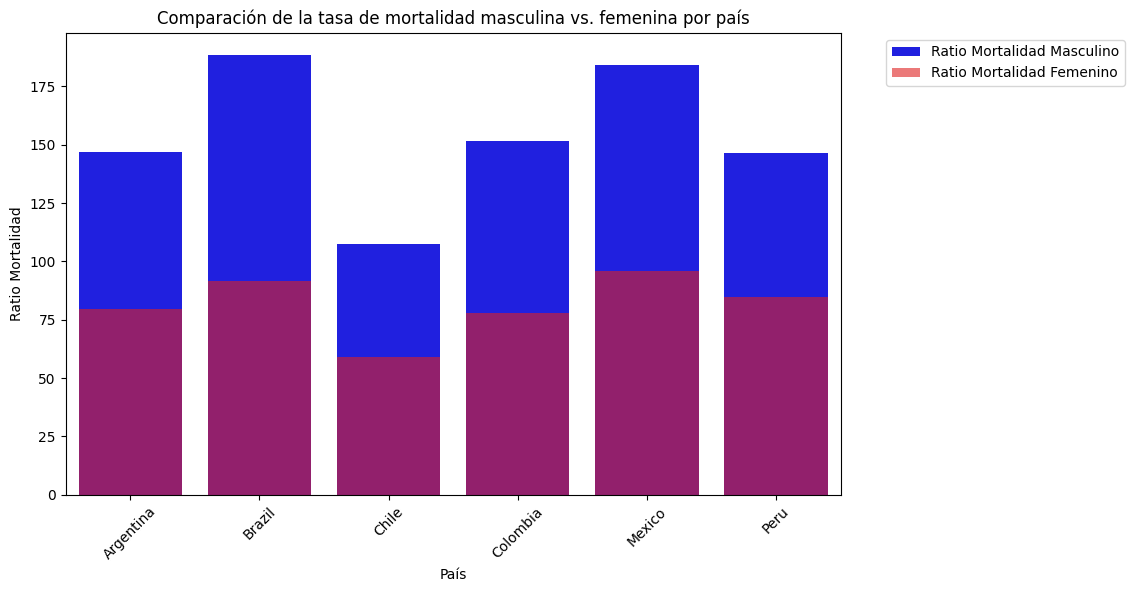

In [51]:
#Grafica de mortalidad por genero

plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x="country_name", y="adult_male_mortality_rate", color="blue", label= "Ratio Mortalidad Masculino")
sns.barplot(data=data_latinoamerica_paises, x="country_name", y="adult_female_mortality_rate", color="red", alpha=0.6, label= "Ratio Mortalidad Femenino")
plt.xticks(rotation=45)
plt.ylabel("Ratio Mortalidad")
plt.xlabel("País")
plt.title("Comparación de la tasa de mortalidad masculina vs. femenina por país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

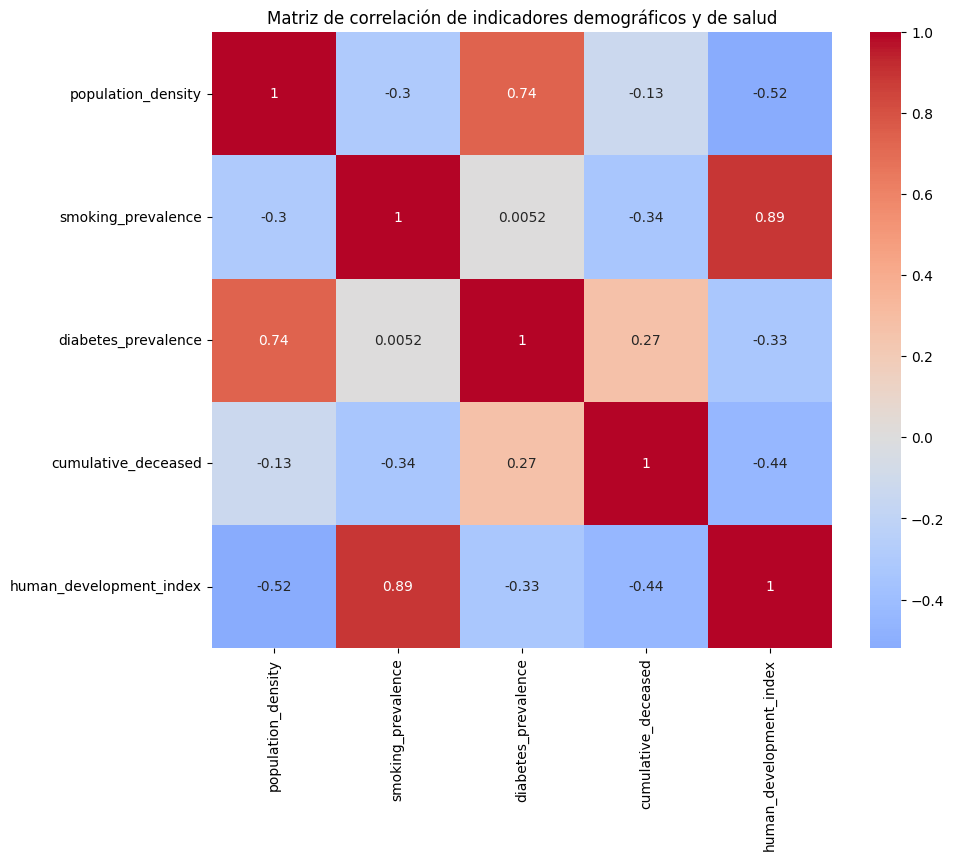

In [52]:
#Matriz de correlación de indicadores demográficos y de salud.
columns = ["population_density", "smoking_prevalence", "diabetes_prevalence", "cumulative_deceased", "human_development_index"]
correlation_matrix = data_latinoamerica_paises[columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de indicadores demográficos y de salud")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

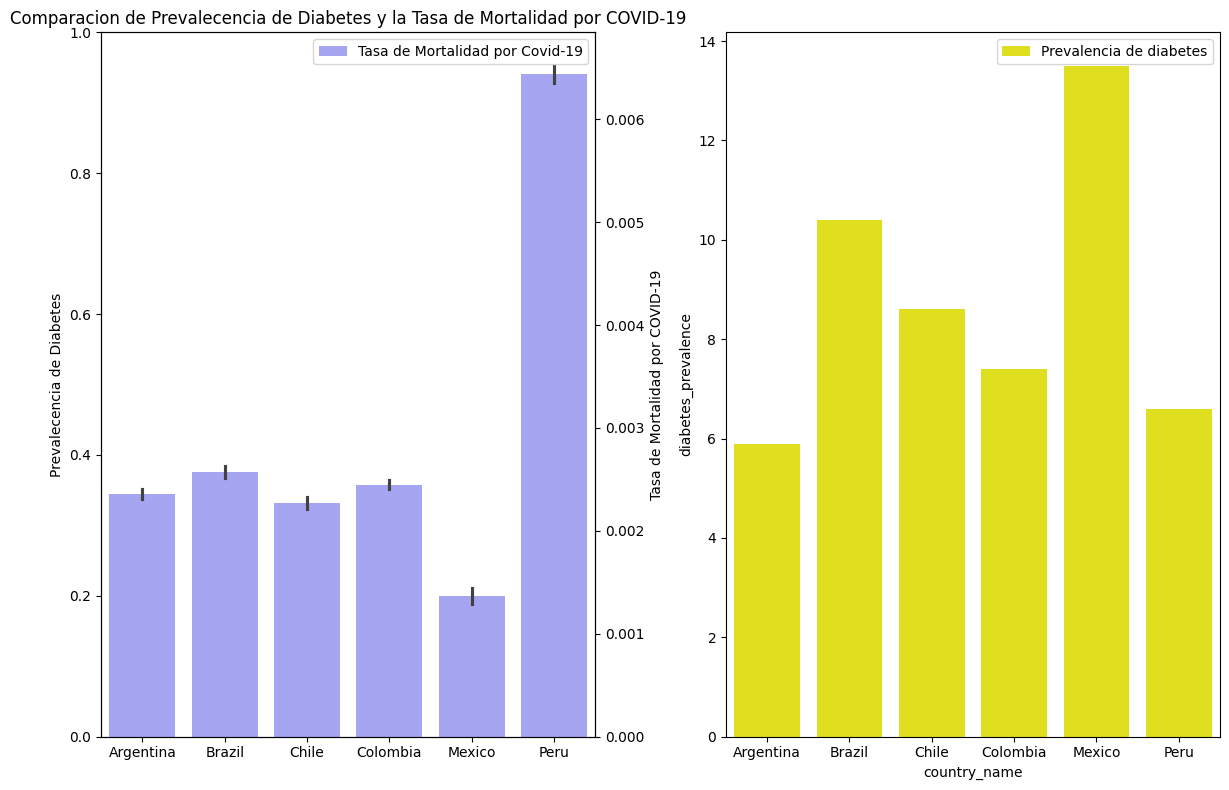

In [62]:
fig, (ax,ax2) = plt.subplots(1,2, figsize=(12,8))
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises["country_name"], y=data_latinoamerica_paises["diabetes_prevalence"], color="yellow", label="Prevalencia de diabetes")
ax2 = ax.twinx() #para que duplique los valores de ax en ax2
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises["country_name"], y=data_latinoamerica_paises["cumulative_deceased"] / data_latinoamerica_paises["population"], color="Blue", label="Tasa de Mortalidad por Covid-19", ax=ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel("Prevalecencia de Diabetes")
ax2.set_ylabel("Tasa de Mortalidad por COVID-19")
plt.title("Comparacion de Prevalecencia de Diabetes y la Tasa de Mortalidad por COVID-19")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

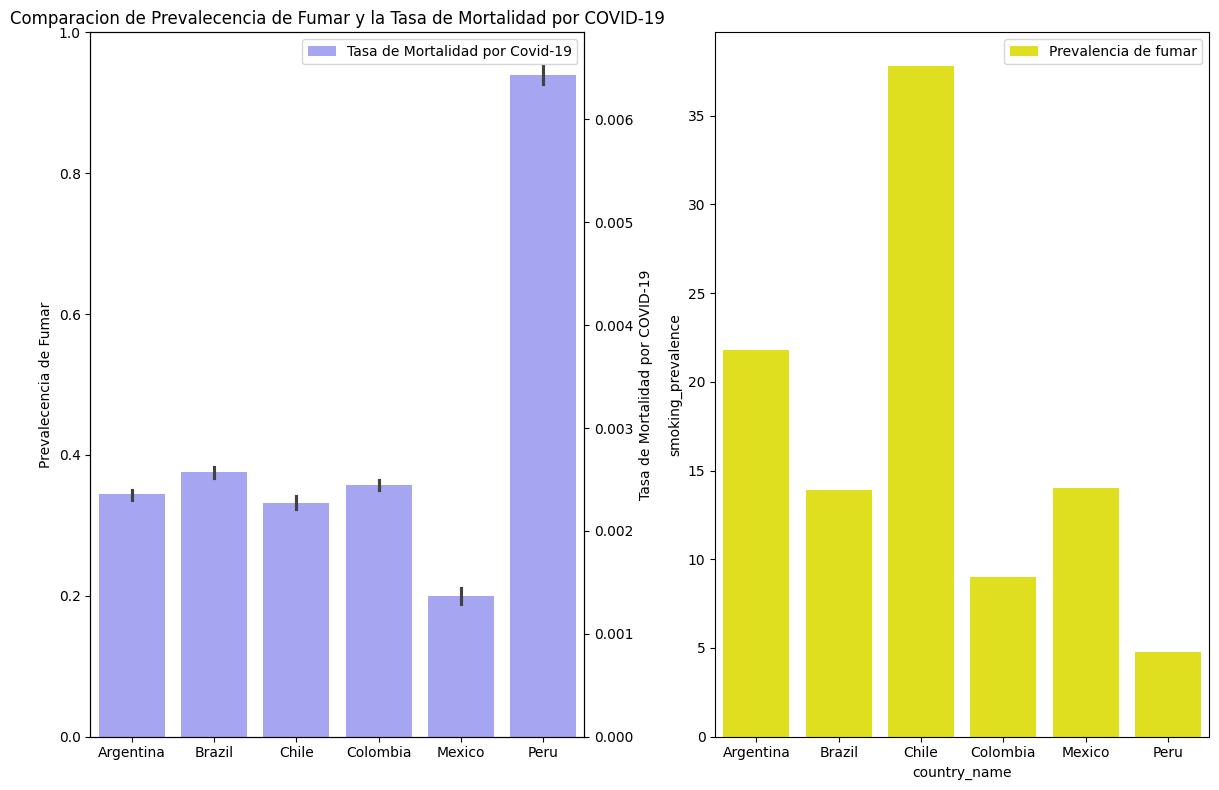

In [63]:
fig, (ax,ax2) = plt.subplots(1,2, figsize=(12,8))
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises["country_name"], y=data_latinoamerica_paises["smoking_prevalence"], color="yellow", label="Prevalencia de fumar")
ax2 = ax.twinx() #para que duplique los valores de ax en ax2
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises["country_name"], y=data_latinoamerica_paises["cumulative_deceased"] / data_latinoamerica_paises["population"], color="Blue", label="Tasa de Mortalidad por Covid-19", ax=ax2,
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel("Prevalecencia de Fumar")
ax2.set_ylabel("Tasa de Mortalidad por COVID-19")
plt.title("Comparacion de Prevalecencia de Fumar y la Tasa de Mortalidad por COVID-19")
plt.tight_layout()
plt.show

## Avance 3

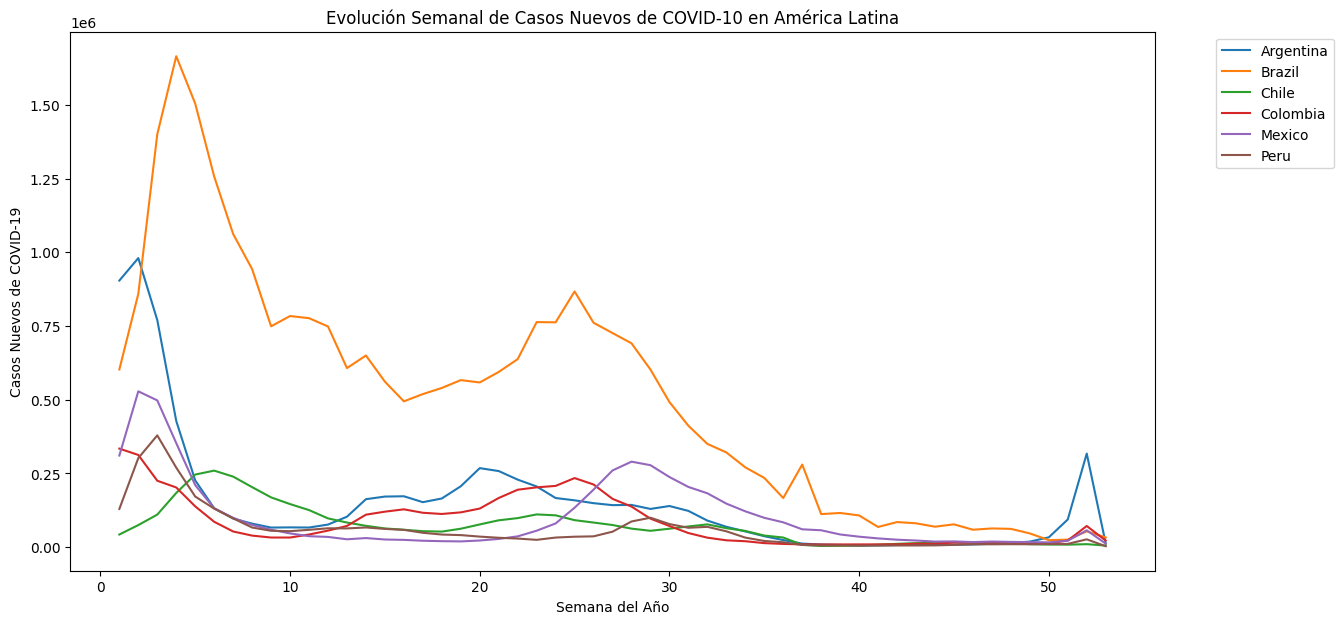

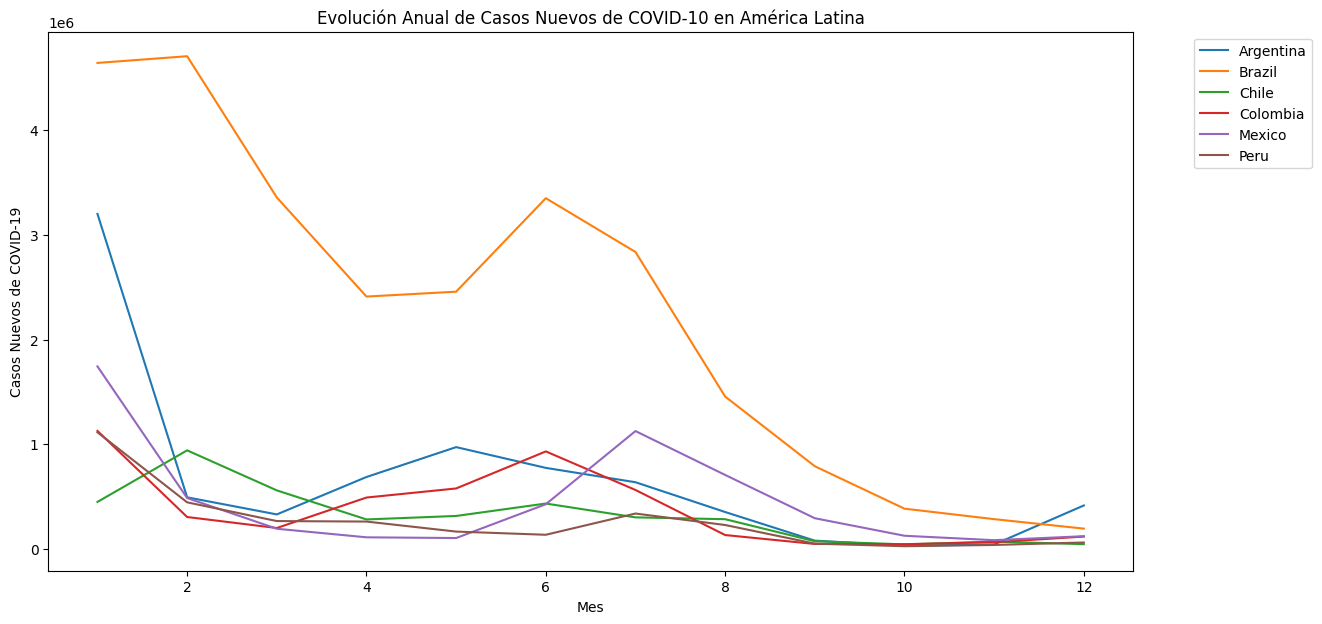

In [71]:
#Analisis de evolución de casos de COVID-19 en America Latina por semana

data_latinoamerica_paises["week"]=data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises["year"]=data_latinoamerica_paises.index.isocalendar().year
weekly_cases = data_latinoamerica_paises.groupby(["country_name", "week"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14,7))
for country in weekly_cases["country_name"].unique():
    country_weekly_cases= weekly_cases[weekly_cases["country_name"]==country]
    plt.plot(country_weekly_cases["week"], country_weekly_cases["new_confirmed"], label=country)

plt.xlabel("Semana del Año")
plt.ylabel("Casos Nuevos de COVID-19")
plt.title("Evolución Semanal de Casos Nuevos de COVID-10 en América Latina")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

#por año
data_latinoamerica_paises["month"]=data_latinoamerica_paises.index.month
yearly_cases = data_latinoamerica_paises.groupby(["country_name", "month"])["new_confirmed"].sum().reset_index()
plt.figure(figsize=(14,7))
for country in yearly_cases["country_name"].unique():
    country_yearly_cases= yearly_cases[yearly_cases["country_name"]==country]
    plt.plot(country_yearly_cases["month"], country_yearly_cases["new_confirmed"], label=country)

plt.xlabel("Mes")
plt.ylabel("Casos Nuevos de COVID-19")
plt.title("Evolución Anual de Casos Nuevos de COVID-10 en América Latina")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


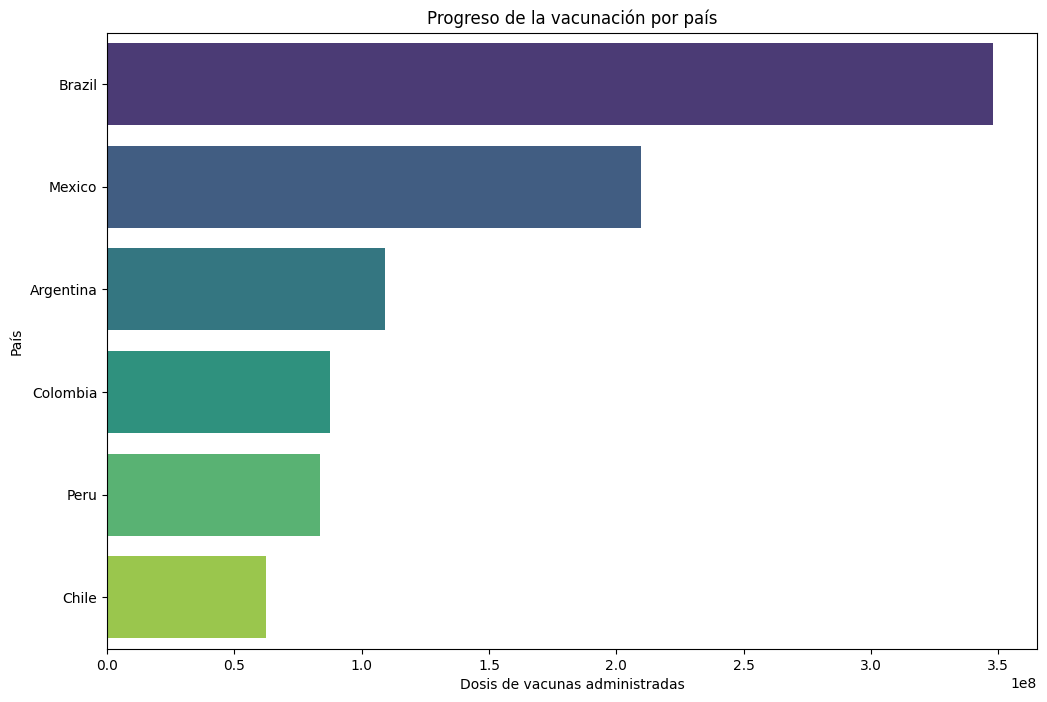

In [73]:
vaccination_data = data_latinoamerica_paises.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette="viridis")
plt.xlabel("Dosis de vacunas administradas")
plt.ylabel("País")
plt.title("Progreso de la vacunación por país")

plt.show()

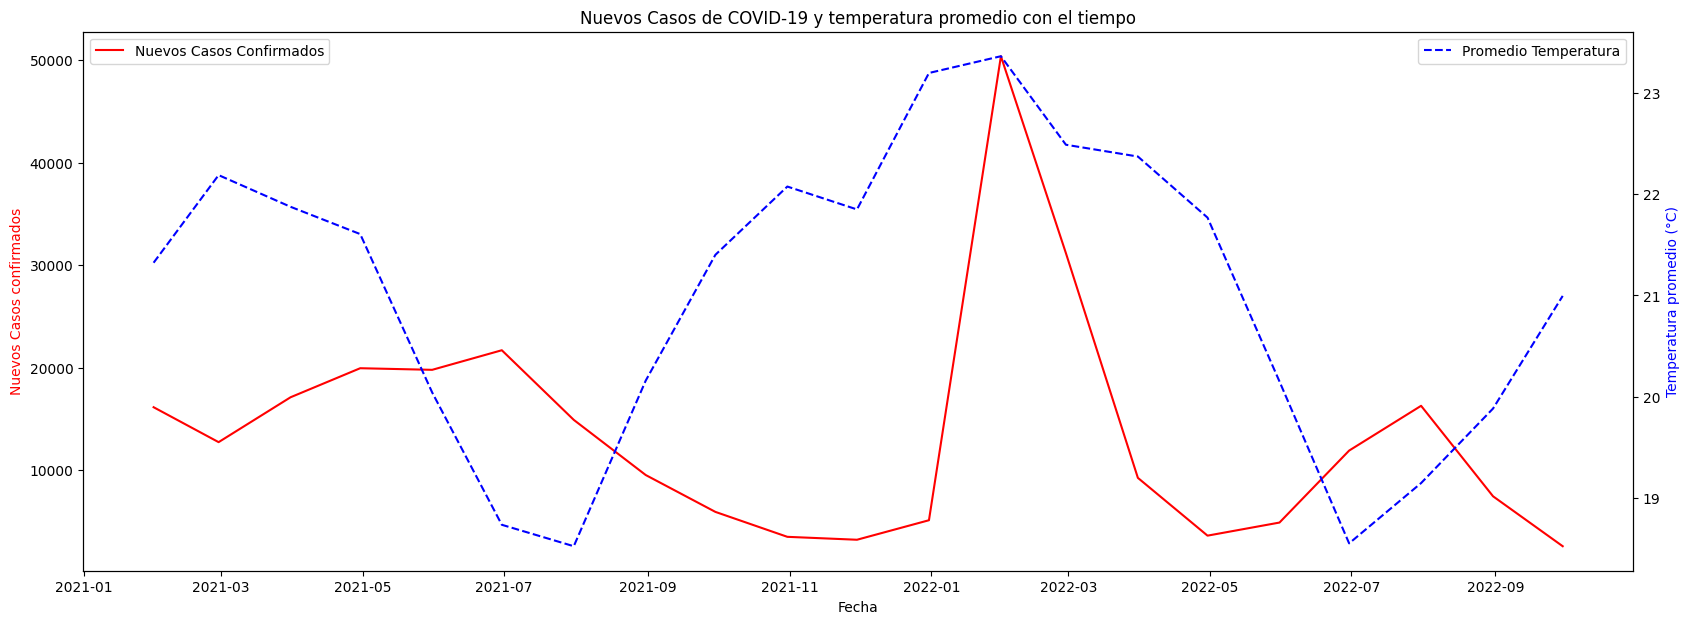

In [77]:
#Relacion entre temperatura promedio y nuevos casos confirmados

plt.figure(figsize=(20,7))
ax1=plt.gca()
ax2=ax1.twinx()
ax1.plot(data_latinoamerica_paises.resample("ME").mean(numeric_only=True).index, data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["new_confirmed"], color="red", label="Nuevos Casos Confirmados")
ax2.plot(data_latinoamerica_paises.resample("ME").mean(numeric_only=True).index, data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["average_temperature_celsius"], color="blue", label="Promedio Temperatura", linestyle="--")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Nuevos Casos confirmados", color="red")
ax2.set_ylabel("Temperatura promedio (°C)", color="blue")
plt.title("Nuevos Casos de COVID-19 y temperatura promedio con el tiempo")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()


C:\Users\anala\AppData\Local\Temp\ipykernel_2672\3552790533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases["urban_population_percentage"], y=urban_cases.index, palette="viridis")


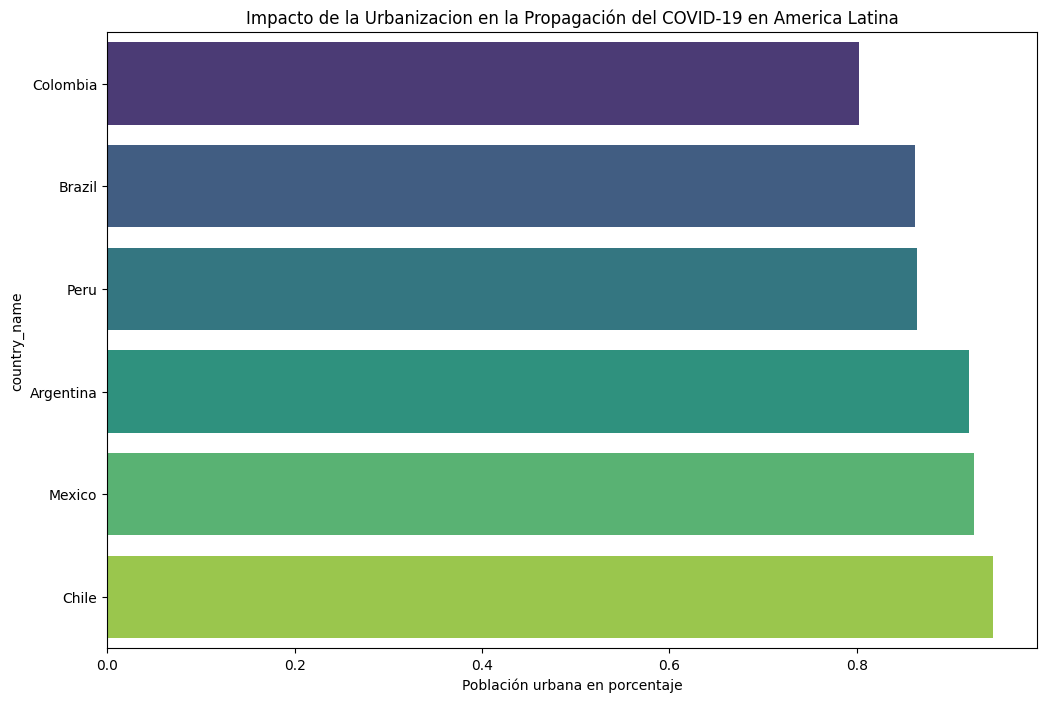

In [84]:
data_latinoamerica_paises["urban_population_percentage"]=data_latinoamerica_paises["population_urban"] / data_latinoamerica_paises["population"]
urban_cases = data_latinoamerica_paises.groupby("country_name").last().sort_values(by="urban_population_percentage")

plt.figure(figsize=(12,8))
sns.barplot(x=urban_cases["urban_population_percentage"], y=urban_cases.index, palette="viridis")
plt.title("Impacto de la Urbanizacion en la Propagación del COVID-19 en America Latina")
plt.xlabel("Población urbana en porcentaje")
plt.show()

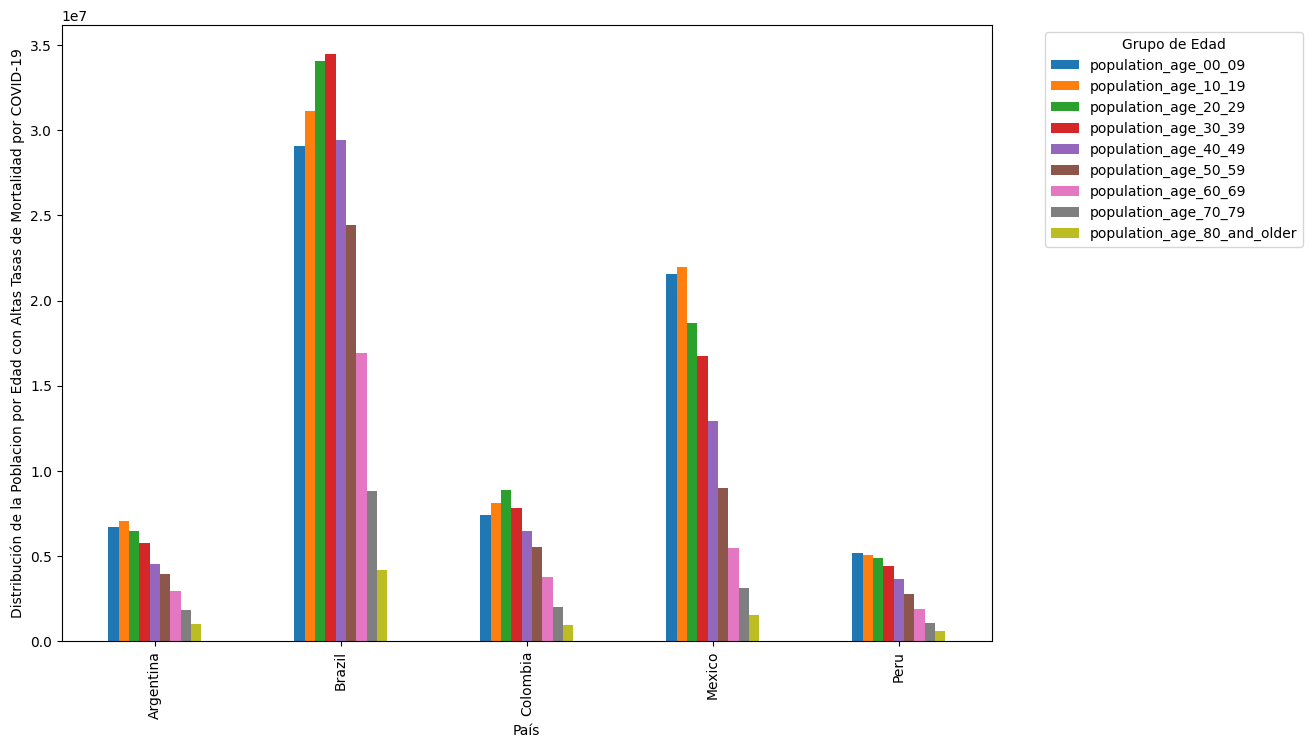

In [91]:
high_mortality_countries = data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().sort_values(ascending=False).head(5).index #para ver top 5
age_groups = ["population_age_00_09", "population_age_10_19", "population_age_20_29", "population_age_30_39", "population_age_40_49", "population_age_50_59", "population_age_60_69", "population_age_70_79", "population_age_80_and_older"]
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises["country_name"].isin(high_mortality_countries)].groupby("country_name")[age_groups].mean()

age_distribution.plot(kind="bar",stacked=False, figsize=(12,8))
plt.xlabel("País")
plt.ylabel("Distribución de la Poblacion por Edad con Altas Tasas de Mortalidad por COVID-19")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Grupo de Edad")
plt.show()

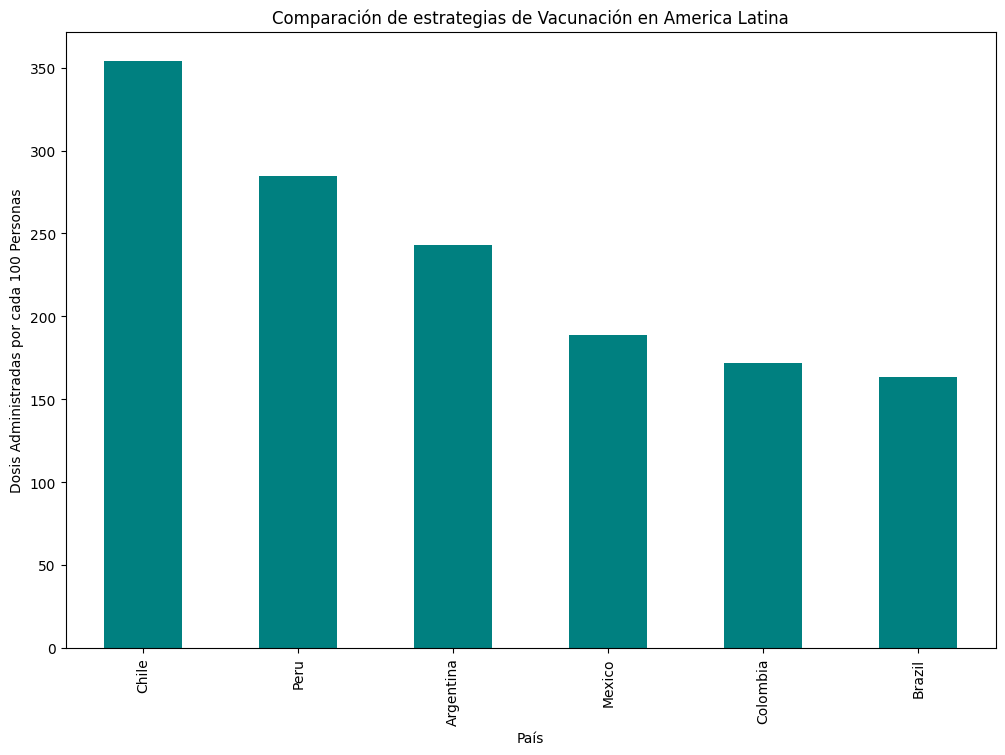

In [93]:
vaccination_strategy= data_latinoamerica_paises.groupby("country_name")["cumulative_vaccine_doses_administered"].max() / data_latinoamerica_paises.groupby("country_name")["population"].max()*100
vaccination_strategy.sort_values (ascending=False).plot(kind="bar", figsize=(12,8), color="teal")
plt.xlabel("País")
plt.ylabel("Dosis Administradas por cada 100 Personas")
plt.title("Comparación de estrategias de Vacunación en America Latina")
plt.show()

In [96]:
data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index

Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [97]:
data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

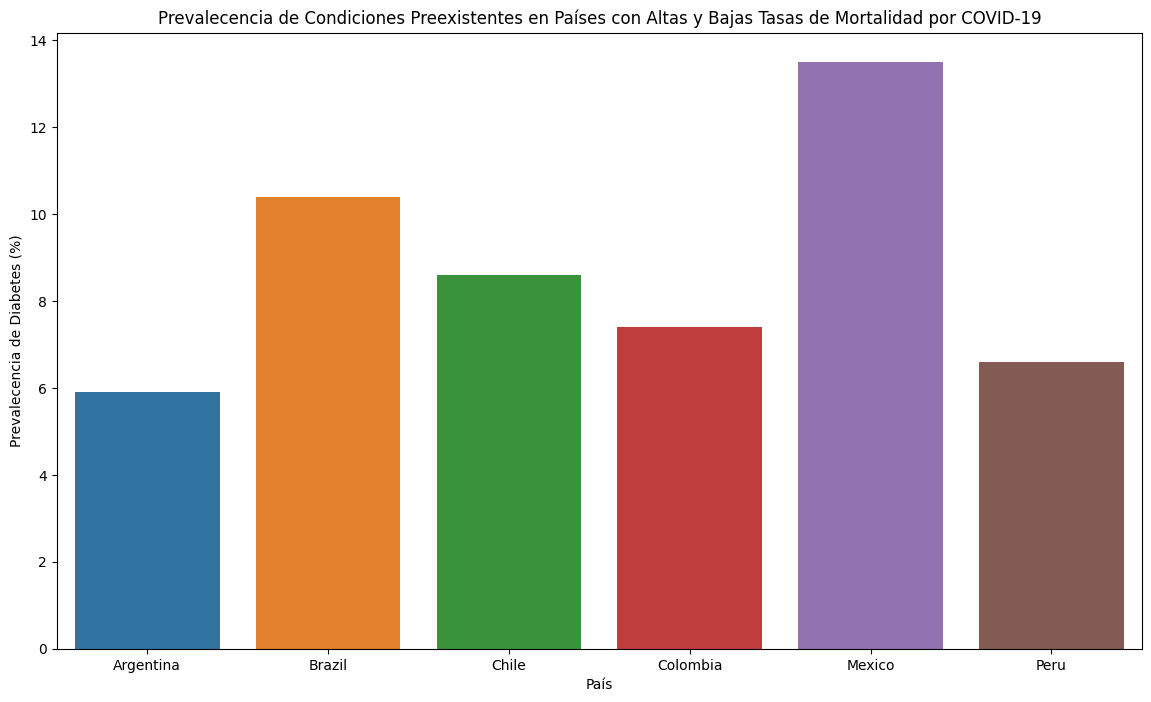

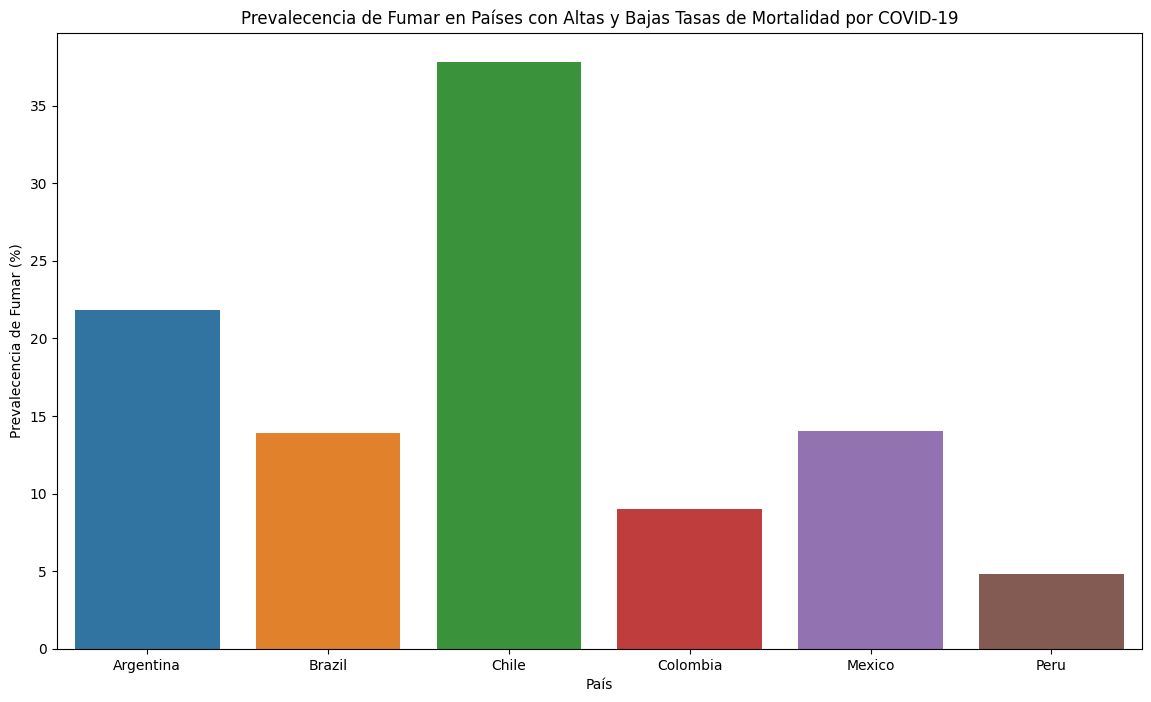

In [98]:
#Prevalecencia de diabetes
top_countries = data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index
bottom_countries= data_latinoamerica_paises.groupby("country_name")["cumulative_deceased"].max().nsmallest(5).index
conditions_data= data_latinoamerica_paises[data_latinoamerica_paises["country_name"].isin(top_countries.union(bottom_countries))]

plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x="country_name", y="diabetes_prevalence", hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalecencia de Diabetes (%)")
plt.title("Prevalecencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19")
plt.show()

#Prevalecencia de fumar
plt.figure(figsize=(14,8))
sns.barplot(data=conditions_data, x="country_name", y="smoking_prevalence", hue="country_name")
plt.xlabel("País")
plt.ylabel("Prevalecencia de Fumar (%)")
plt.title("Prevalecencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19")
plt.show()


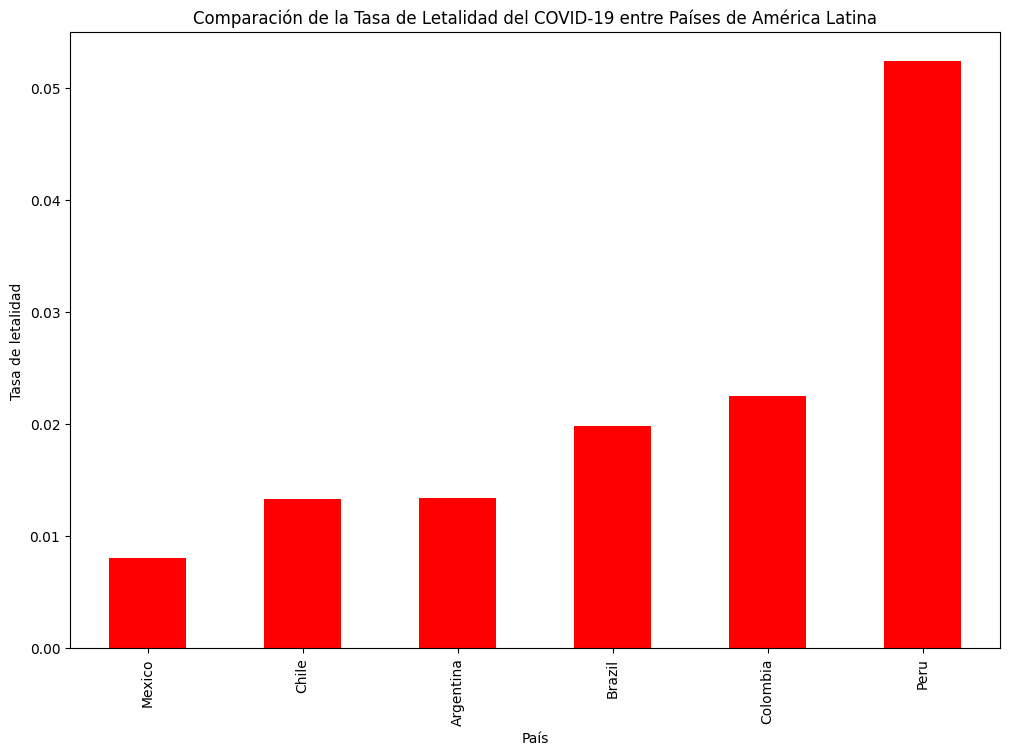

In [99]:
#Tasa de letalidad por pais
data_latinoamerica_paises["case_fatality_rate"] = data_latinoamerica_paises["cumulative_deceased"] / data_latinoamerica_paises["cumulative_confirmed"]
fatality_rates = data_latinoamerica_paises.groupby("country_name")["case_fatality_rate"].last().sort_values()

plt.figure(figsize=(12,8))
bars= fatality_rates.plot(kind="bar", color="red")
plt.xlabel("País")
plt.ylabel("Tasa de letalidad")
plt.title("Comparación de la Tasa de Letalidad del COVID-19 entre Países de América Latina")
plt.show()

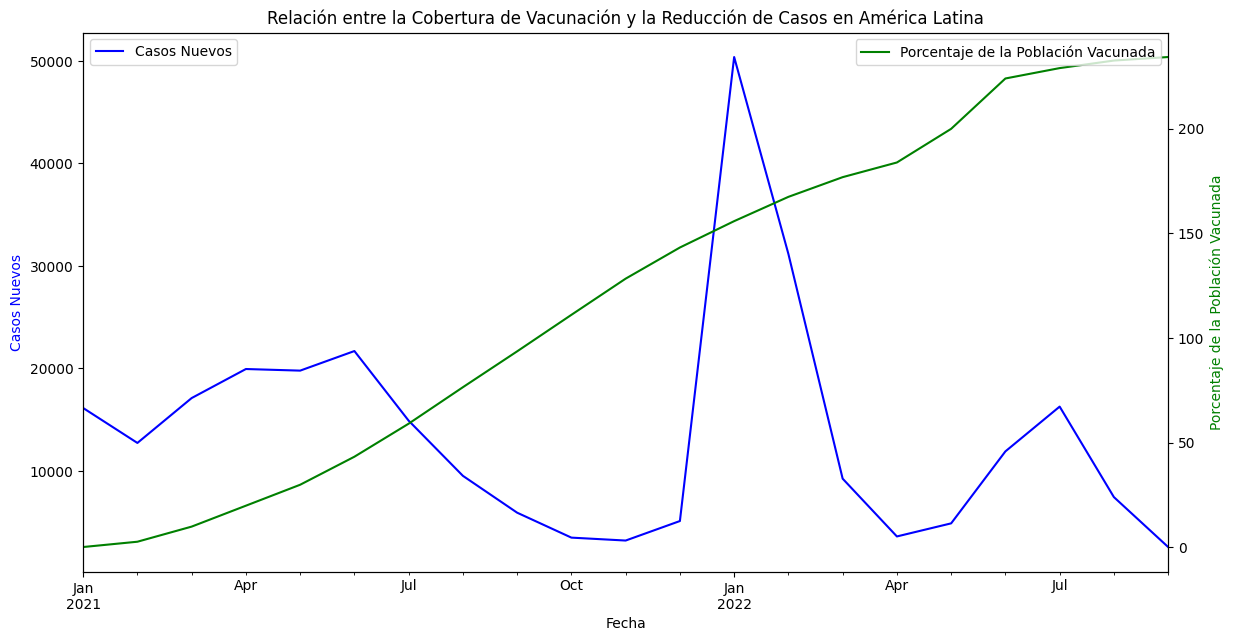

In [103]:
#Evolucion de vacunación en America Latina y reduccion de casos de COVID-19
plt.figure(figsize=(14,7))
ax1=plt.gca()
ax2=ax1.twinx()

data_latinoamerica_paises["percentage_vaccinated"] = (data_latinoamerica_paises["cumulative_vaccine_doses_administered"] / data_latinoamerica_paises["population"] * 100)
data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["new_confirmed"].plot(ax=ax1, color="blue", label="Casos Nuevos")
data_latinoamerica_paises.resample("ME").mean(numeric_only=True)["percentage_vaccinated"].plot(ax=ax2, color="green", label="Porcentaje de la Población Vacunada")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Casos Nuevos", color="blue")
ax2.set_ylabel("Porcentaje de la Población Vacunada", color="green")
ax1.set_title("Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

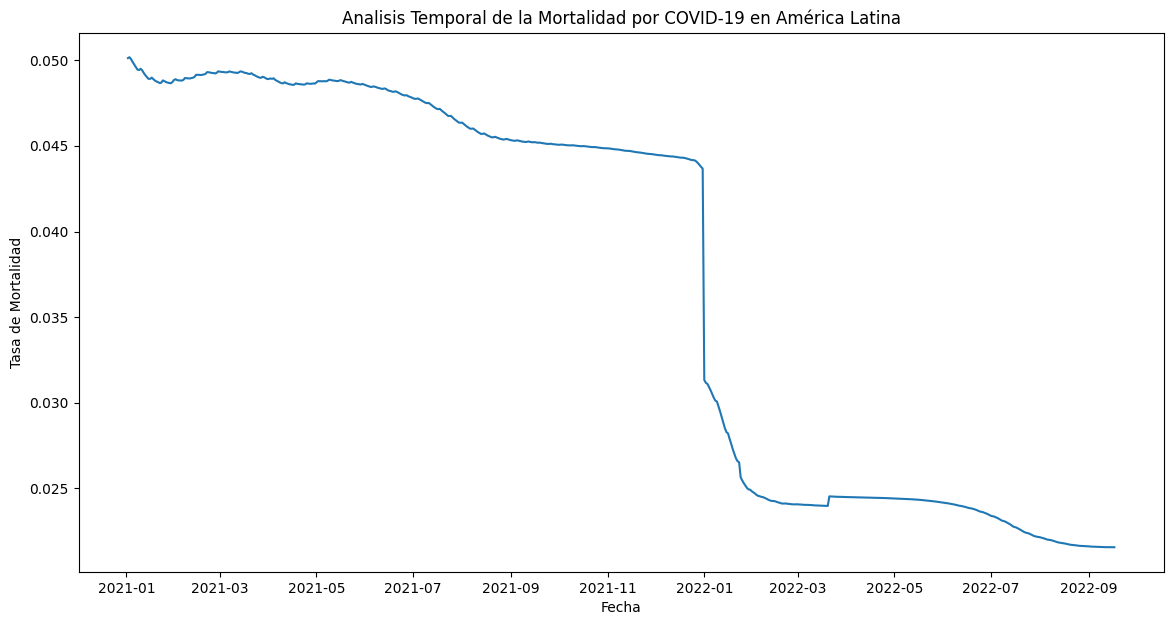

In [108]:
#como evoluciona la mortalidad
data_latinoamerica_paises["mortality_rate"] = data_latinoamerica_paises["cumulative_deceased"]/data_latinoamerica_paises["cumulative_confirmed"]

plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises, x="date", y="mortality_rate", estimator="mean", errorbar=None)
plt.title("Analisis Temporal de la Mortalidad por COVID-19 en América Latina")
plt.xlabel("Fecha")
plt.ylabel("Tasa de Mortalidad")
plt.show()

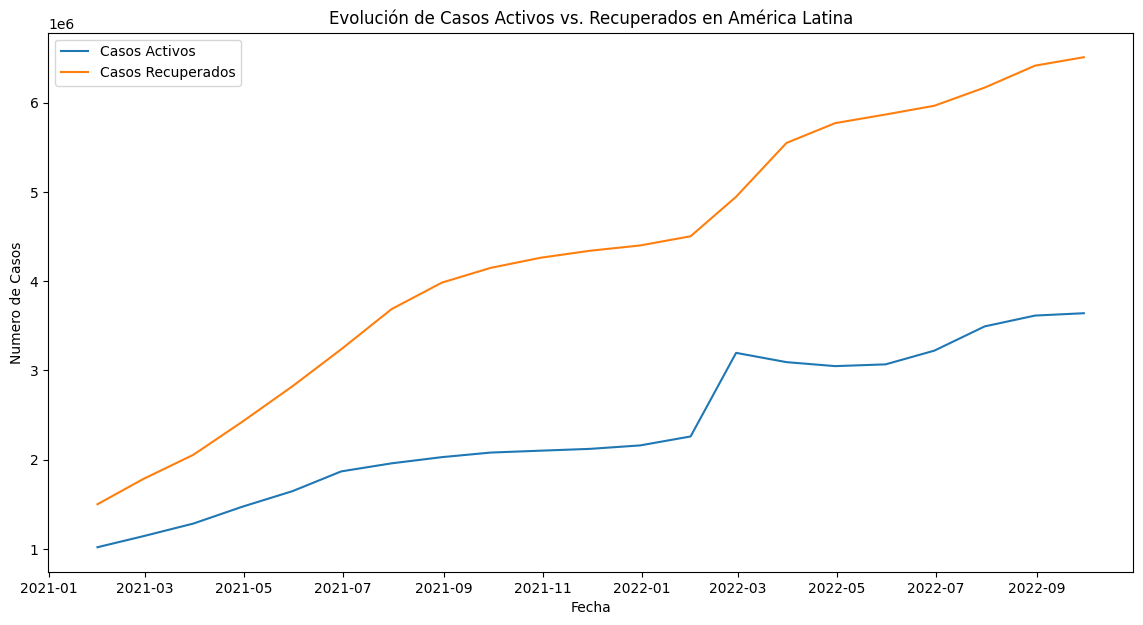

In [110]:
#evolucion de casos activos y recuperados en América Latina
data_latinoamerica_paises["active_cases"]= data_latinoamerica_paises["cumulative_confirmed"] - data_latinoamerica_paises["cumulative_deceased"] - data_latinoamerica_paises["cumulative_recovered"]
plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises.resample("ME").mean(numeric_only=True), x="date", y="active_cases", label="Casos Activos")
sns.lineplot(data=data_latinoamerica_paises.resample("ME").mean(numeric_only=True), x="date", y="cumulative_recovered", label="Casos Recuperados")
plt.xlabel("Fecha")
plt.ylabel("Numero de Casos")
plt.title("Evolución de Casos Activos vs. Recuperados en América Latina")
plt.show()

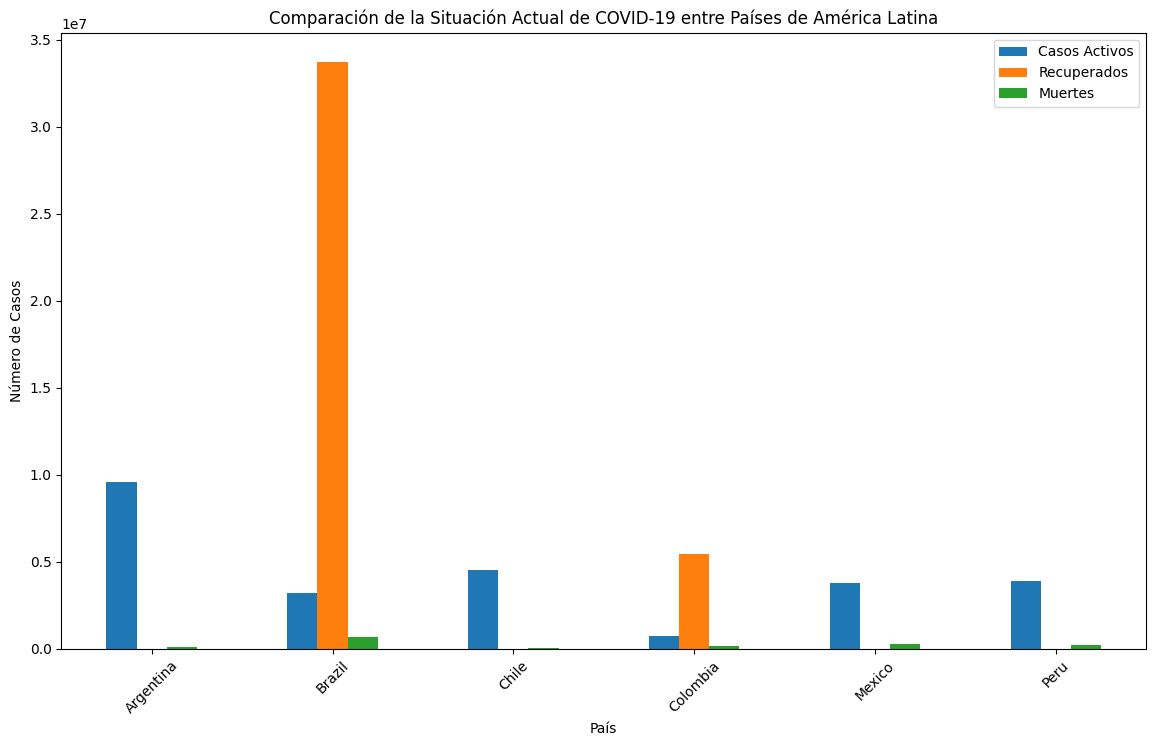

In [113]:
#no se tienen datos pero si de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby("country_name").max()[["active_cases", "cumulative_recovered", "cumulative_deceased"]]
current_situation.plot(kind="bar", stacked=False, figsize=(14,8))
plt.title("Comparación de la Situación Actual de COVID-19 entre Países de América Latina")
plt.xlabel("País")
plt.ylabel("Número de Casos")
plt.legend(["Casos Activos", "Recuperados", "Muertes"])
plt.xticks(rotation=45)
plt.show()